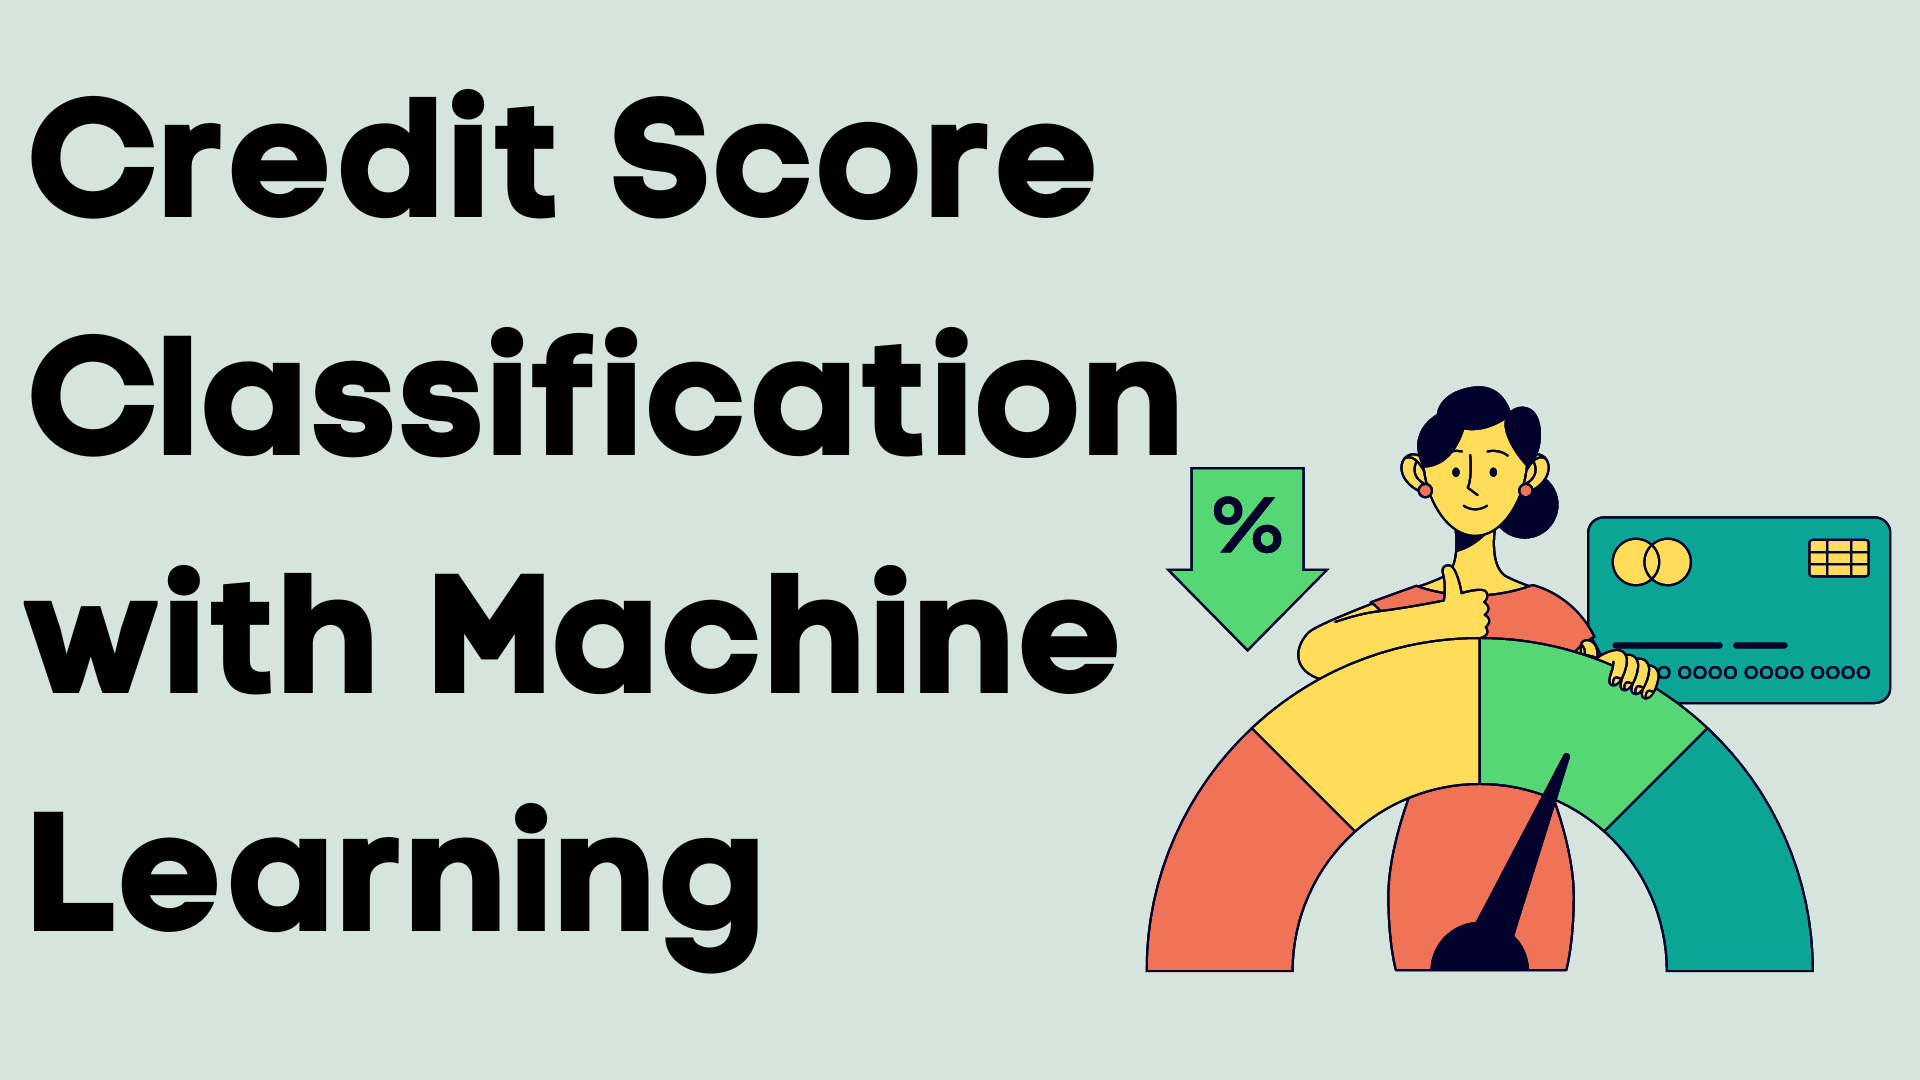

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white", palette=None,rc={'figure.figsize':(11.7,8.27)})
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay


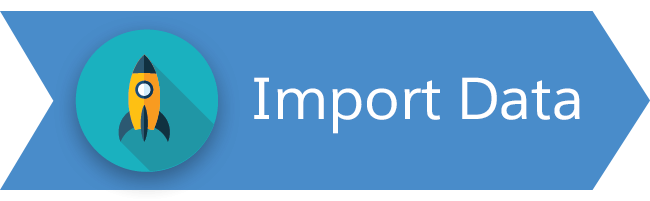

In [2]:
data_credit=pd.read_csv("/kaggle/input/credit-score-classification-dataset/Credit Score Classification Dataset.csv")
data_credit.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


# **EDA**

In [3]:
data_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [4]:
data_credit.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,164.0,37.975610,8.477289,25.0,30.75,37.0,45.0,53.0
Income,164.0,83765.243902,32457.306728,25000.0,57500.00,83750.0,105000.0,162500.0
Number of Children,164.0,0.652439,0.883346,0.0,0.00,0.0,1.0,3.0


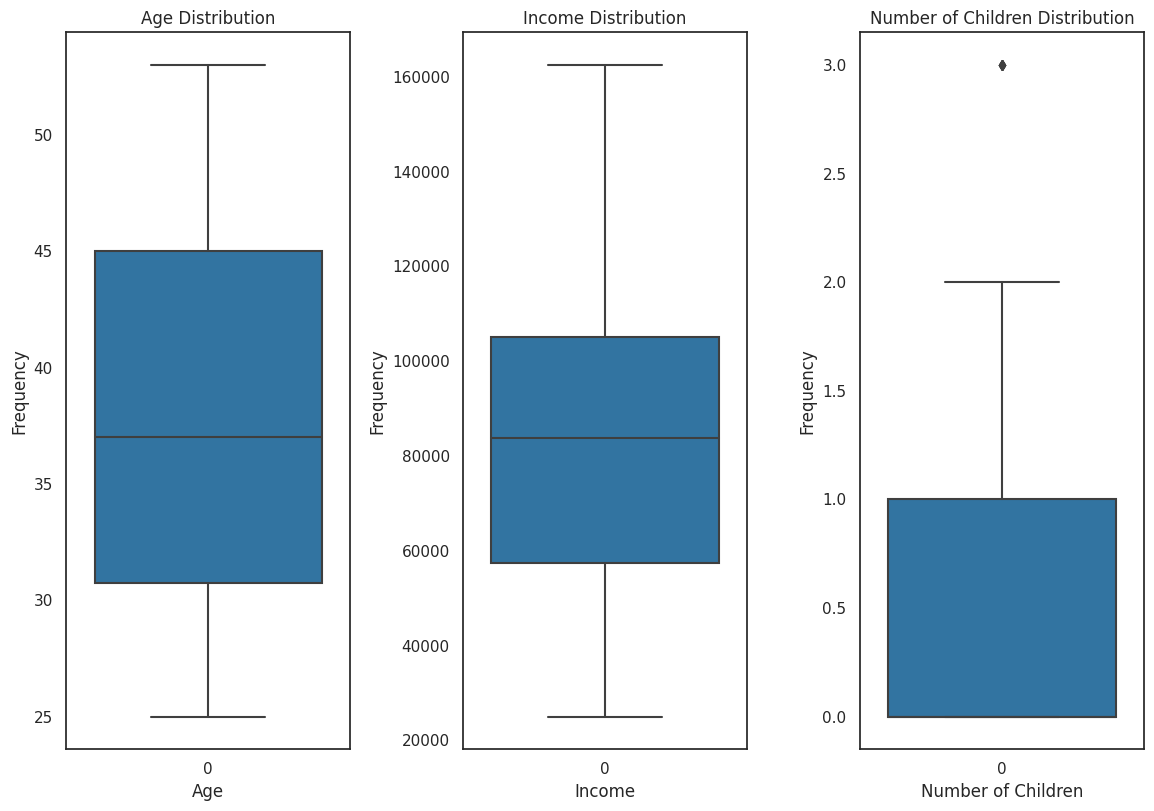

In [5]:
plt.subplot(1, 3, 1)
sns.boxplot(data=data_credit["Age"])
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
sns.boxplot(data=data_credit["Income"])
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")

plt.subplot(1, 3, 3)
sns.boxplot(data=data_credit["Number of Children"])
plt.title("Number of Children Distribution")
plt.xlabel("Number of Children")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [6]:
data_credit.describe(include="object")

,Gender,Education,Marital Status,Home Ownership,Credit Score
count,164,164,164,164,164
unique,2,5,2,2,3
top,Female,Bachelor's Degree,Married,Owned,High
freq,86,42,87,111,113


________________________________________________________________________Gender___________________________________________________________________



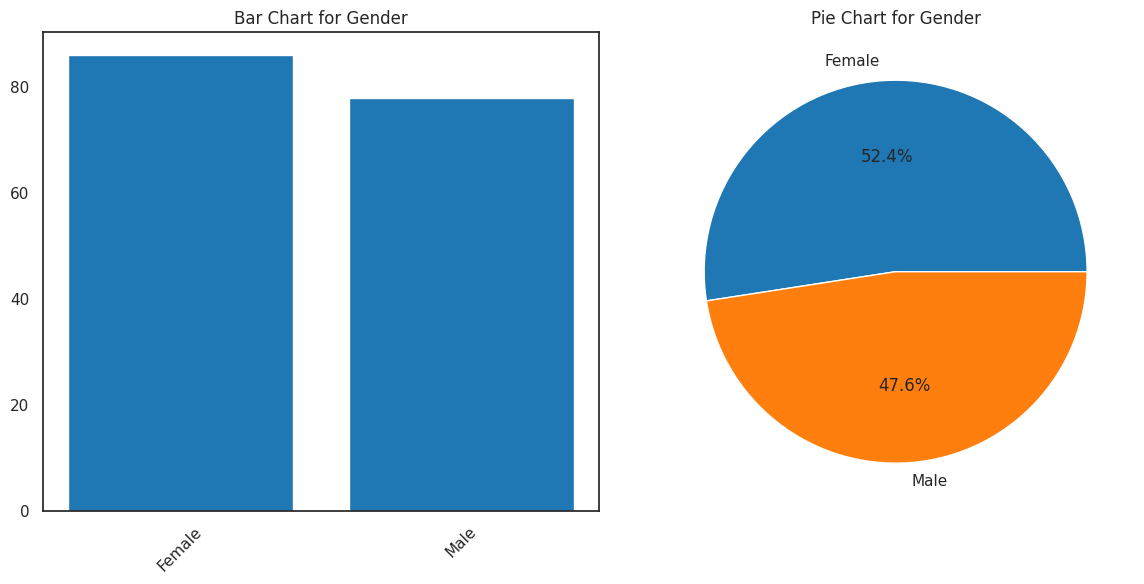

________________________________________________________________________Education___________________________________________________________________



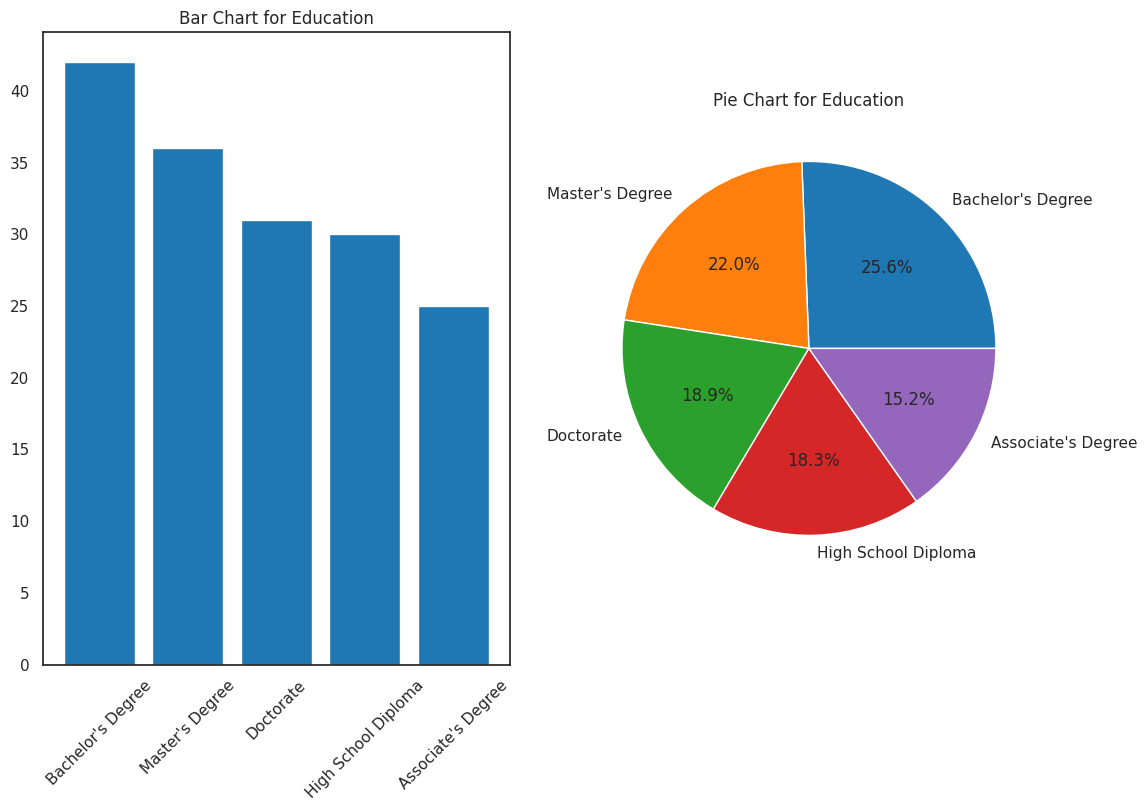

________________________________________________________________________Marital Status___________________________________________________________________



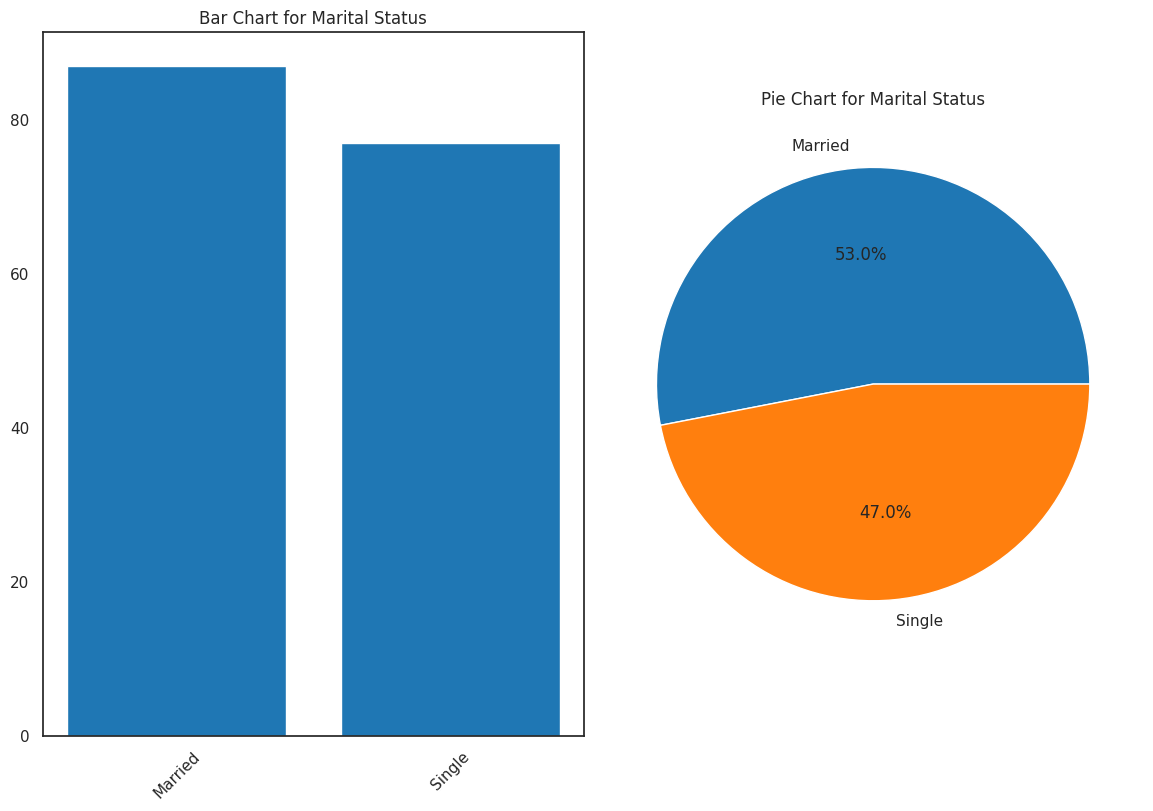

________________________________________________________________________Home Ownership___________________________________________________________________



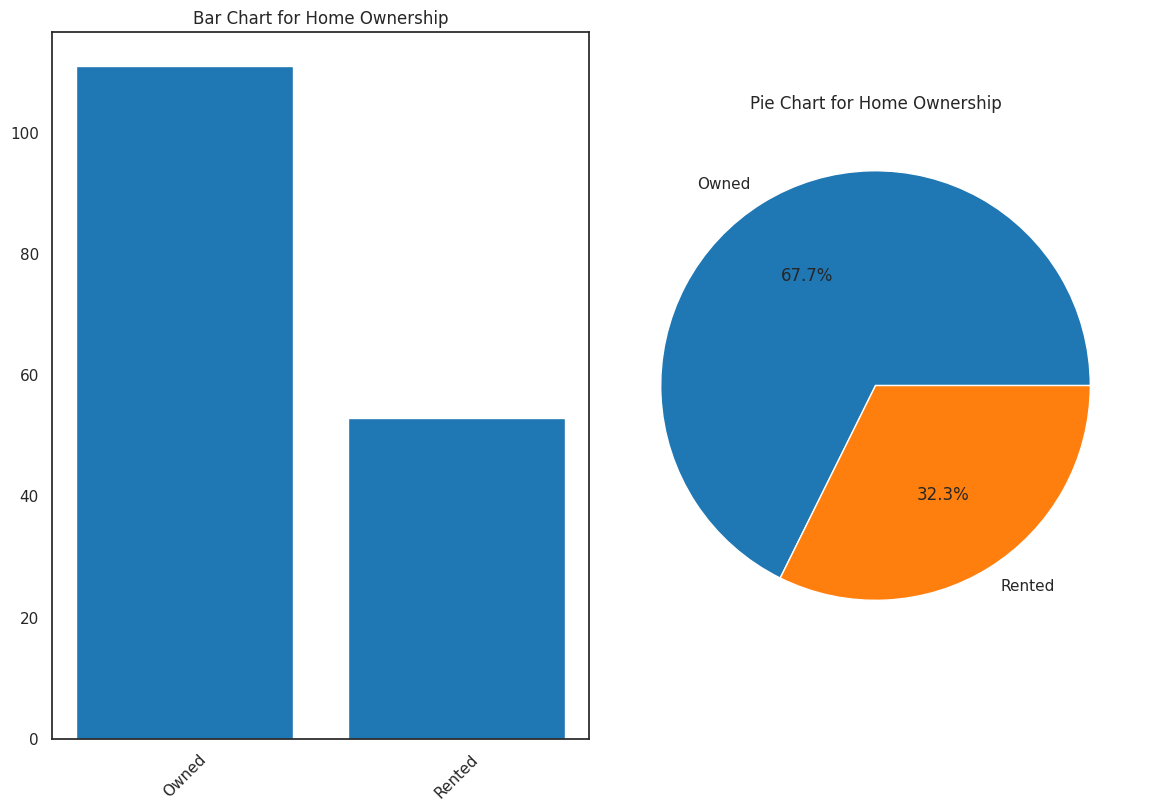

________________________________________________________________________Credit Score___________________________________________________________________



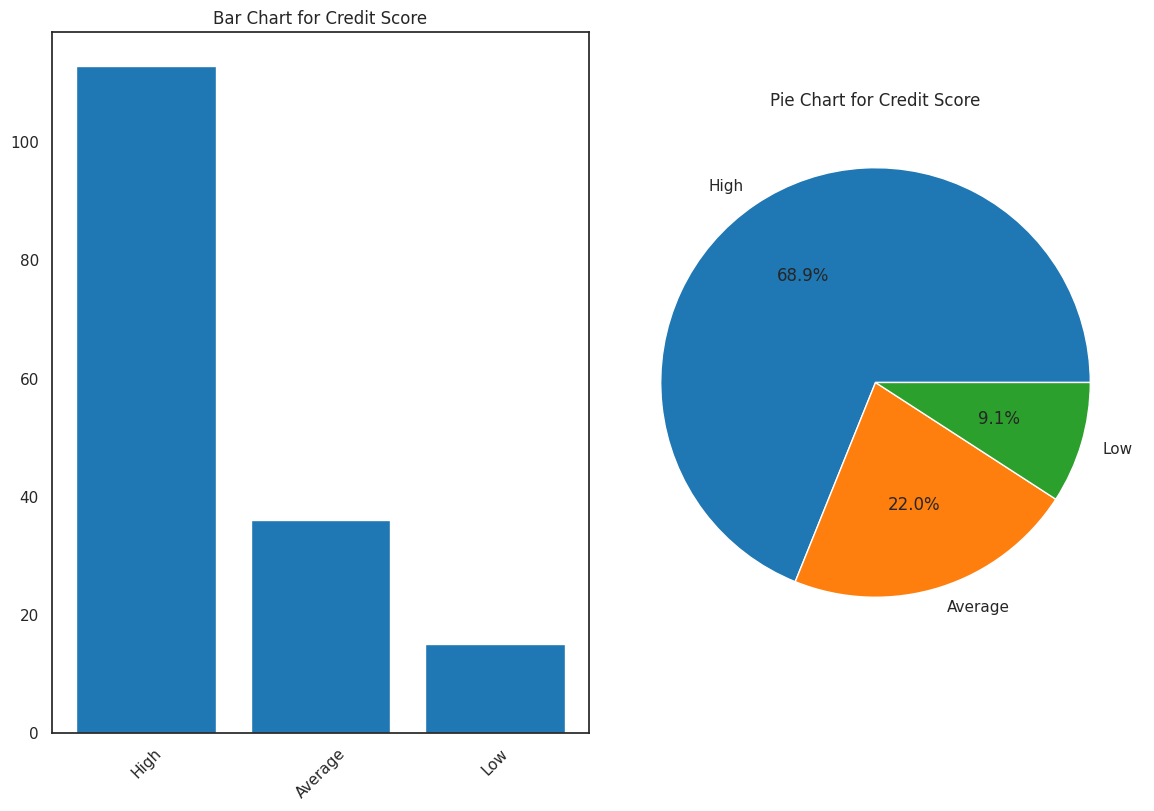

In [7]:
object_data = ["Gender", "Education", "Marital Status", "Home Ownership", "Credit Score"]

plt.figure(figsize=(12, 6))

for col in object_data:
    print(f"________________________________________________________________________{col}___________________________________________________________________\n")

    plt.subplot(1, 2, 1)
    plt.bar(data_credit[col].value_counts().index, data_credit[col].value_counts().values)
    plt.title(f'Bar Chart for {col}')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    plt.pie(data_credit[col].value_counts().values, labels=data_credit[col].value_counts().index, autopct="%1.1f%%")
    plt.title(f'Pie Chart for {col}')

    plt.tight_layout()
    plt.show()


> **Age**

In [8]:
data_credit.Age.unique()

array([25, 30, 35, 40, 45, 50, 26, 31, 36, 41, 46, 51, 27, 32, 37, 42, 47,
       52, 28, 33, 38, 43, 48, 53, 29, 34, 39, 44, 49])

In [9]:
data_credit.Age.value_counts()

Age
25    9
35    9
30    9
31    6
33    6
32    6
29    6
26    6
34    6
28    6
52    5
53    5
48    5
43    5
38    5
39    5
44    5
37    5
47    5
42    5
27    5
51    5
46    5
41    5
36    5
50    5
45    5
40    5
49    5
Name: count, dtype: int64

In [10]:
def density(col):
    for i in object_data:
        print(f"________________________________________________________________________{col} With {i}___________________________________________________________________\n")
        plt.subplot(1,2,1)
        sns.histplot(data=data_credit, x=col, hue=i,kde=True)
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.title(f'Density Plot of {col} with {i}')
        
        plt.subplot(1,2,2)
        sns.ecdfplot(data=data_credit, x=col, hue=i)
        plt.xlabel(col)
        plt.ylabel('proportion')
        plt.title(f'proportion Plot of {col} with {i}')
        
        plt.show()

________________________________________________________________________Age With Gender___________________________________________________________________



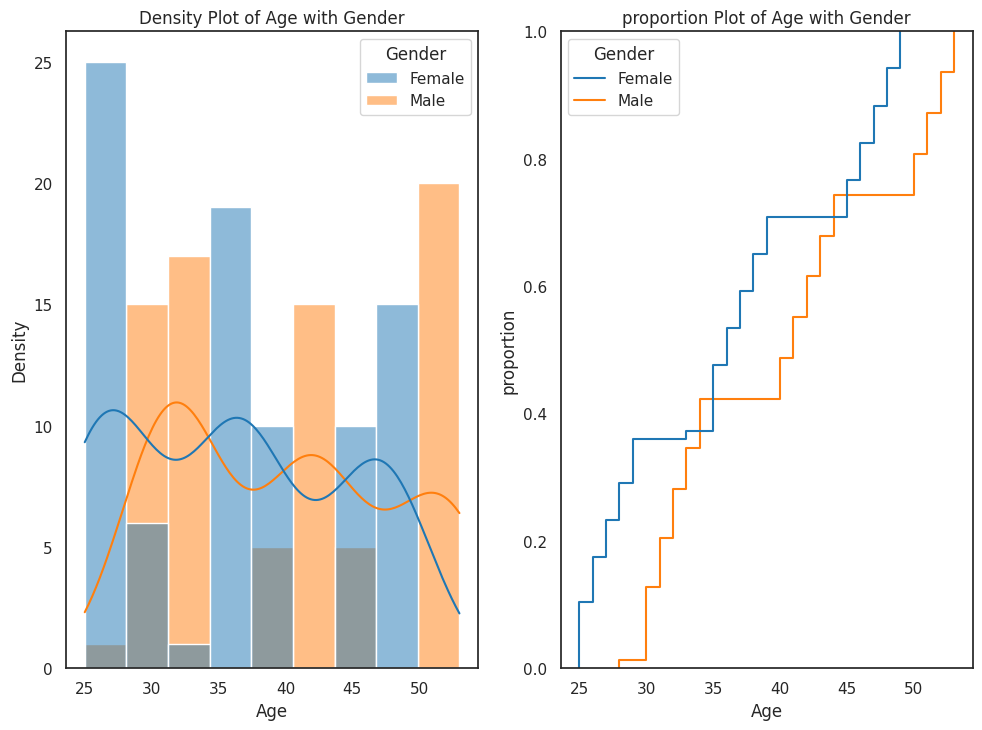

________________________________________________________________________Age With Education___________________________________________________________________



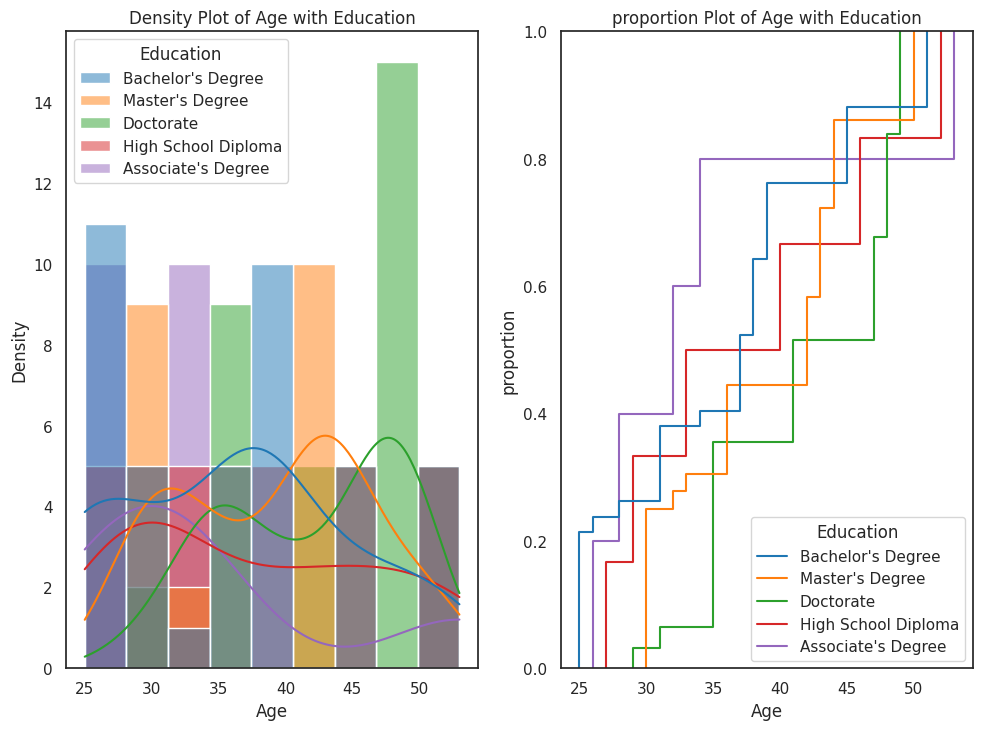

________________________________________________________________________Age With Marital Status___________________________________________________________________



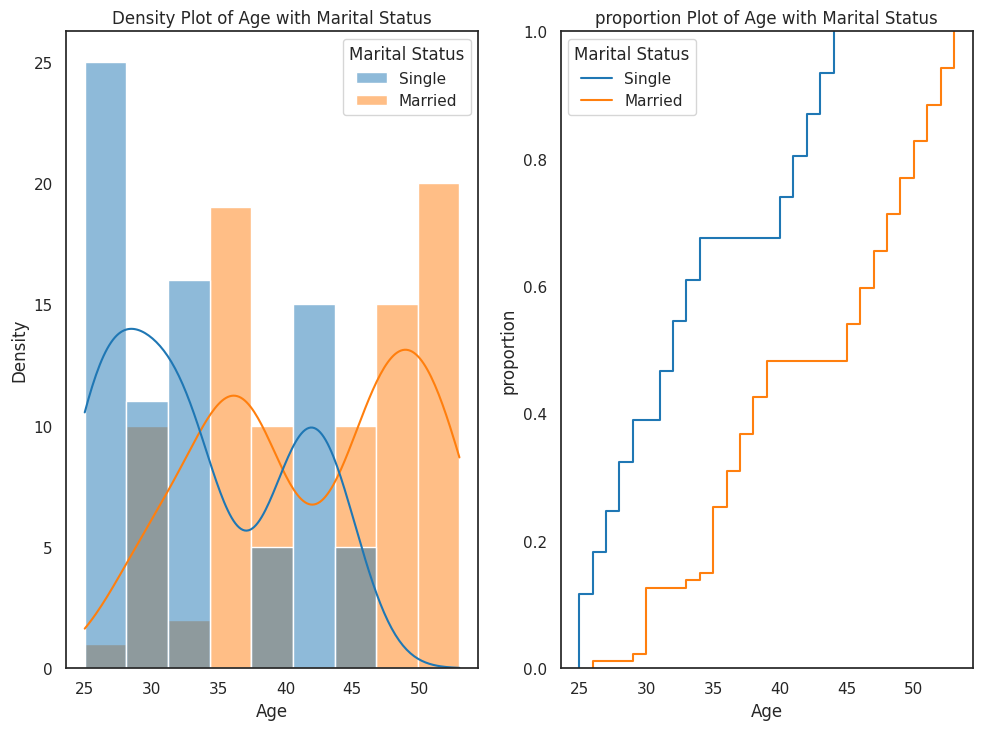

________________________________________________________________________Age With Home Ownership___________________________________________________________________



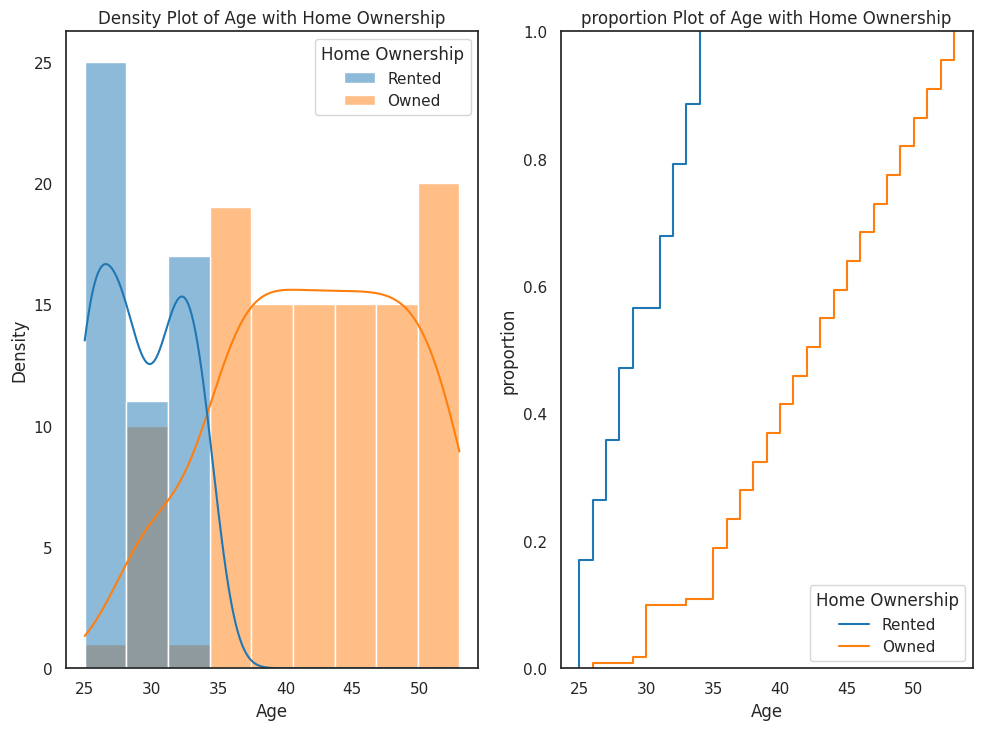

________________________________________________________________________Age With Credit Score___________________________________________________________________



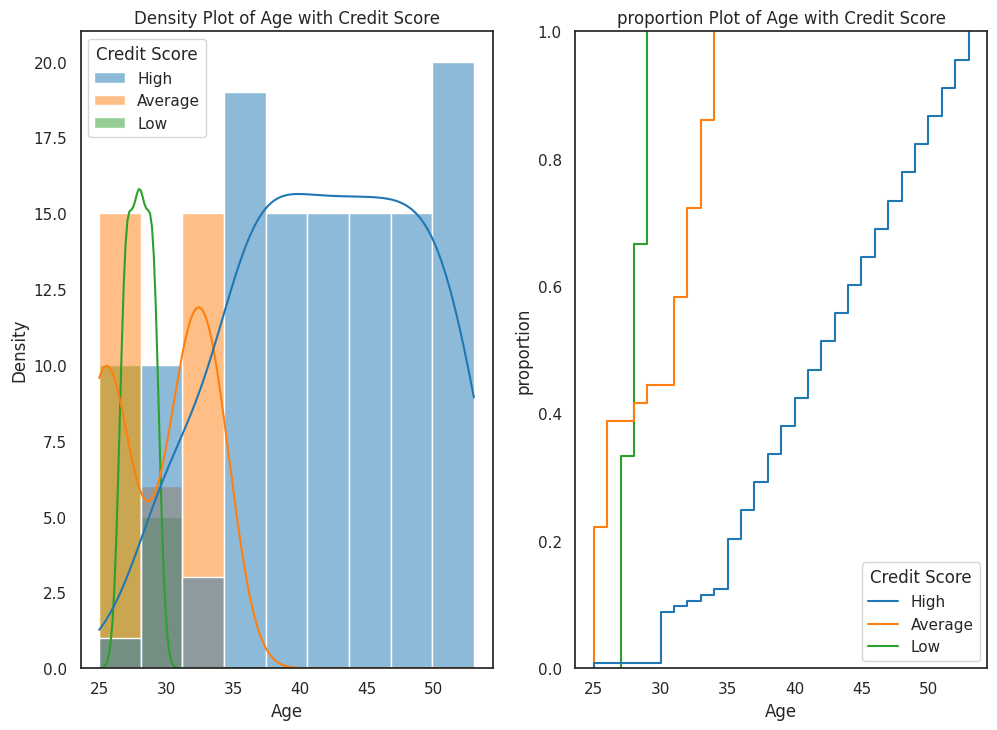

In [11]:
density("Age")

In [12]:
data_credit[data_credit["Age"]==data_credit["Age"].max()]

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
23,53,Male,115000,Associate's Degree,Married,0,Owned,High
52,53,Male,122500,Associate's Degree,Married,0,Owned,High
84,53,Male,125000,Associate's Degree,Married,0,Owned,High
116,53,Male,127500,Associate's Degree,Married,0,Owned,High
158,53,Male,122500,Associate's Degree,Married,0,Owned,High


In [13]:
data_credit[data_credit["Age"]==data_credit["Age"].min()]

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
29,25,Female,55000,Bachelor's Degree,Single,0,Rented,Average
58,25,Female,57500,Bachelor's Degree,Single,0,Rented,Average
61,25,Female,60000,Bachelor's Degree,Single,0,Rented,Average
90,25,Female,57500,Bachelor's Degree,Single,0,Rented,Average
93,25,Female,62500,Bachelor's Degree,Single,0,Rented,Average
122,25,Female,57500,Bachelor's Degree,Single,0,Rented,Average
125,25,Female,60000,Bachelor's Degree,Single,0,Rented,Average
135,25,Female,55000,Bachelor's Degree,Single,0,Rented,Average


In [14]:
data_credit.loc[data_credit["Age"]==25,"Age"]=0
data_credit.loc[(data_credit["Age"]>25) & (data_credit["Age"]<=35),"Age"]=1
data_credit.loc[(data_credit["Age"]>35) & (data_credit["Age"]<=45),"Age"]=2
data_credit.loc[data_credit["Age"]>45,"Age"]=3

data_credit.Age.value_counts()

Age
1    65
2    50
3    40
0     9
Name: count, dtype: int64

> **Gender**

In [15]:
data_credit.Gender.value_counts()

Gender
Female    86
Male      78
Name: count, dtype: int64

In [16]:
def kde_plot(col):
    sns.kdeplot(data=data_credit, x="Income", hue=col, multiple="fill")
    plt.xlabel("Income")
    plt.ylabel("Density")
    plt.title(f"KDE Plot of Income by {col}")
    plt.show()

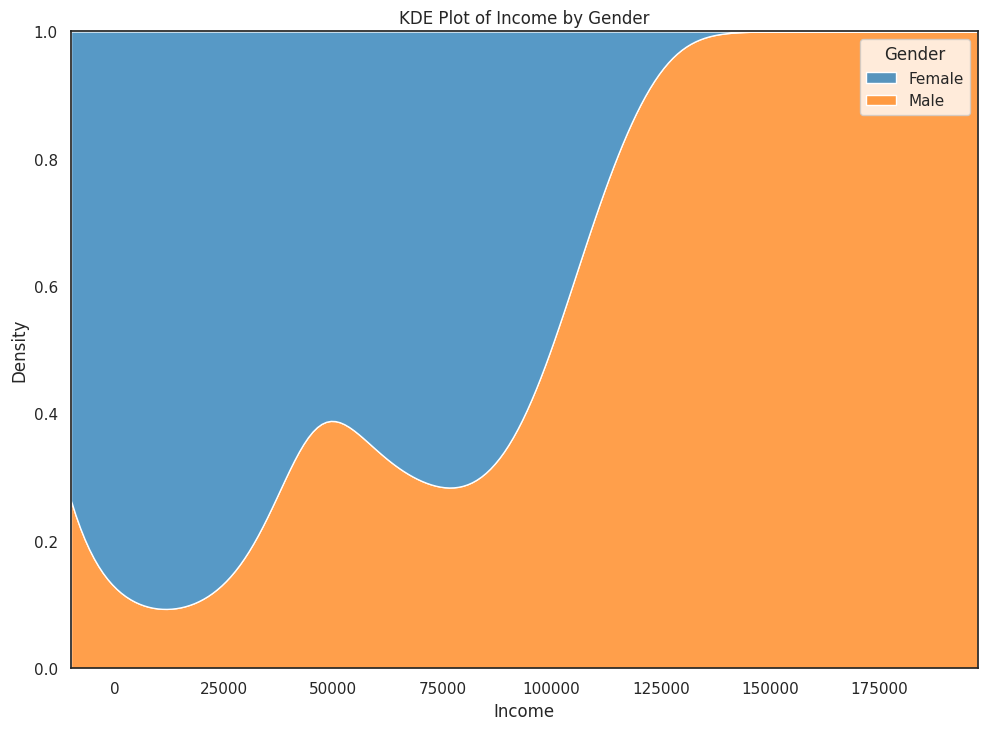

In [17]:
kde_plot("Gender")

In [18]:
gender_mapping = {"Male": 0, "Female": 1}
data_credit["Gender"] = data_credit["Gender"].map(gender_mapping)

data_credit.Gender.value_counts()

Gender
1    86
0    78
Name: count, dtype: int64

> **Income**

In [19]:
data_credit.Income.value_counts()

Income
85000     8
57500     7
105000    7
90000     7
95000     7
77500     5
67500     5
87500     5
62500     5
47500     5
27500     4
110000    4
32500     4
130000    4
52500     4
65000     4
55000     4
37500     4
80000     4
60000     4
75000     4
100000    4
92500     3
112500    3
117500    3
50000     3
70000     3
45000     3
115000    3
125000    3
140000    2
97500     2
142500    2
72500     2
135000    2
150000    2
122500    2
82500     2
155000    2
35000     1
30000     1
40000     1
25000     1
160000    1
145000    1
162500    1
120000    1
102500    1
137500    1
127500    1
82000     1
68000     1
Name: count, dtype: int64

In [20]:
data_credit[data_credit["Income"]==data_credit["Income"].max()]

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
98,3,0,162500,Master's Degree,Married,0,Owned,High


In [21]:
data_credit[data_credit["Income"]==data_credit["Income"].min()]

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
24,1,1,25000,High School Diploma,Single,0,Rented,Low


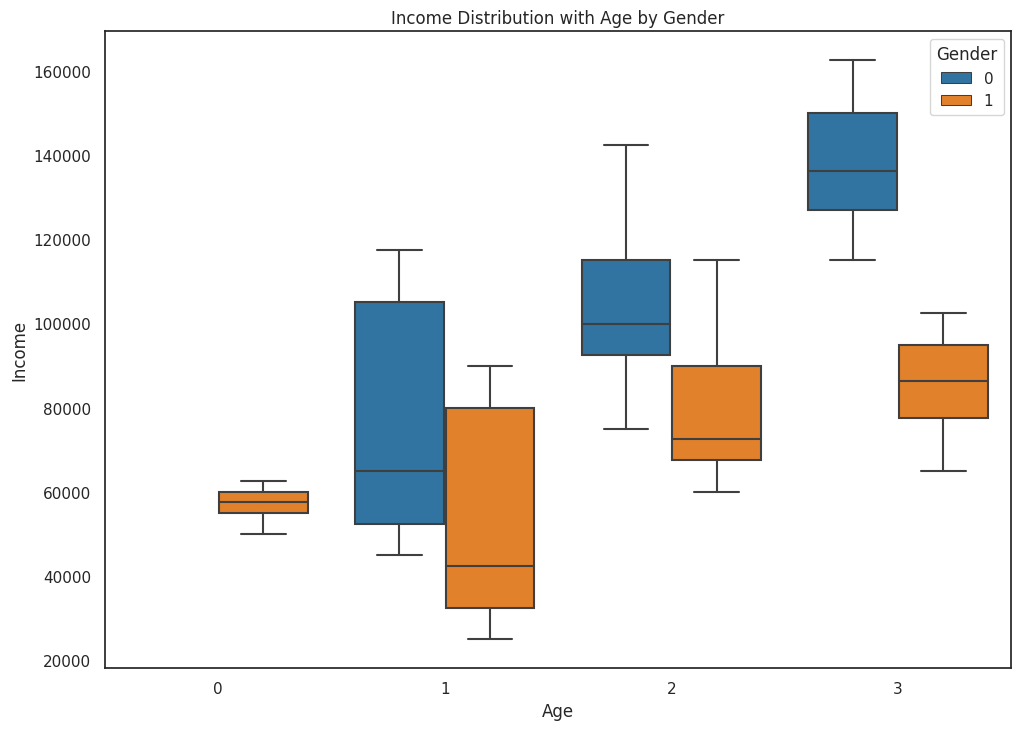

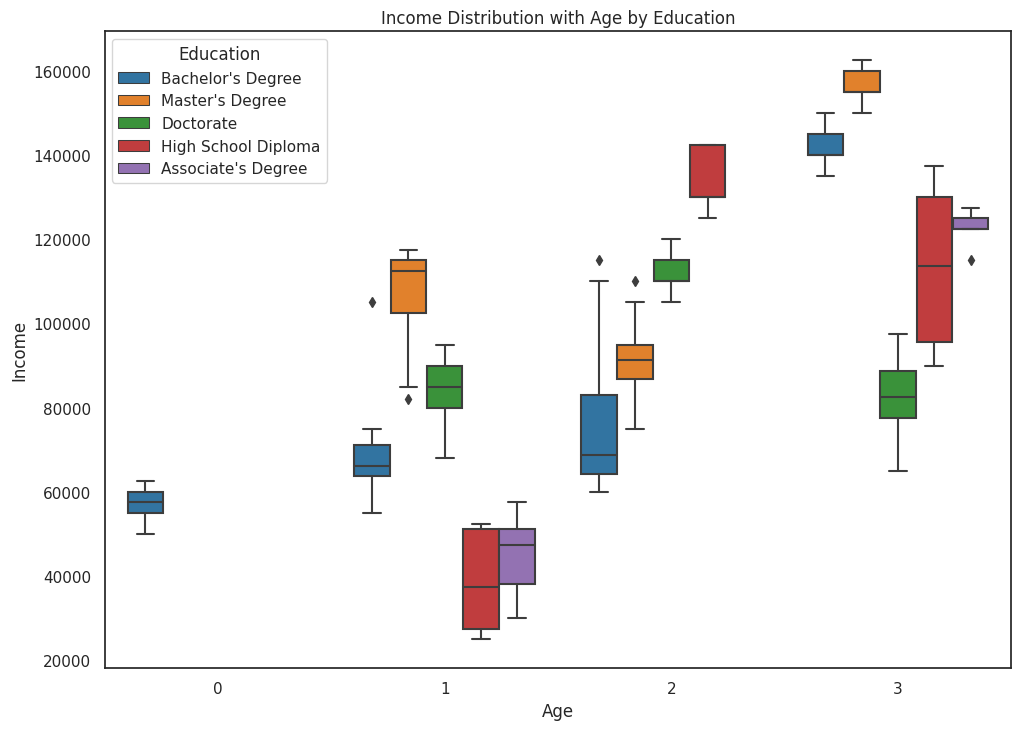

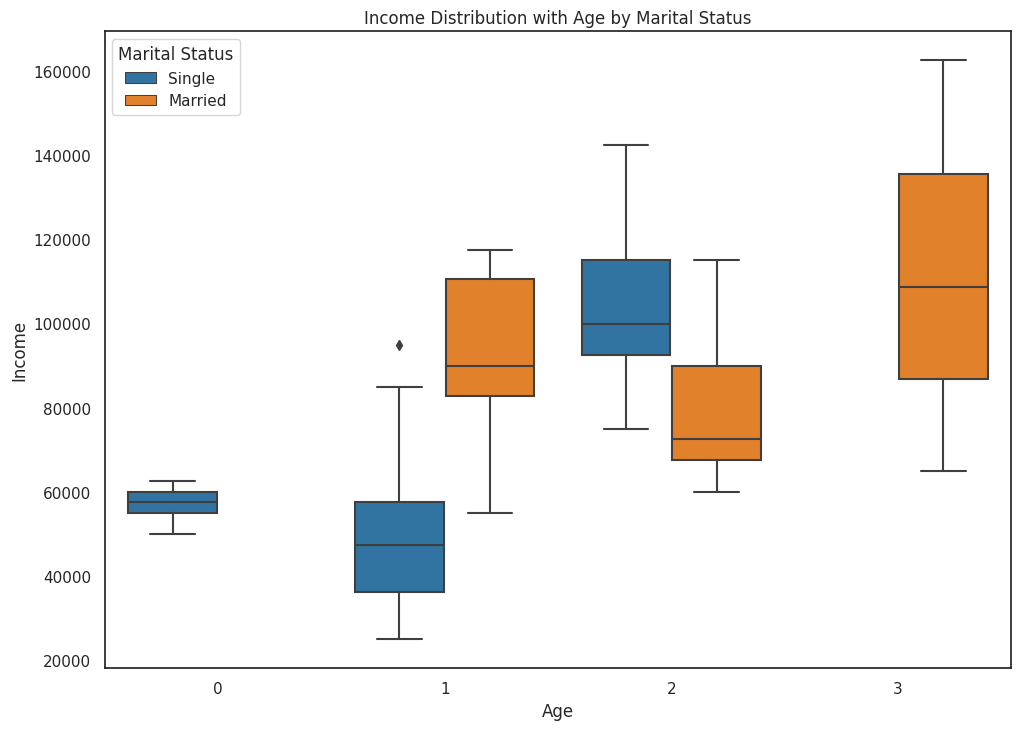

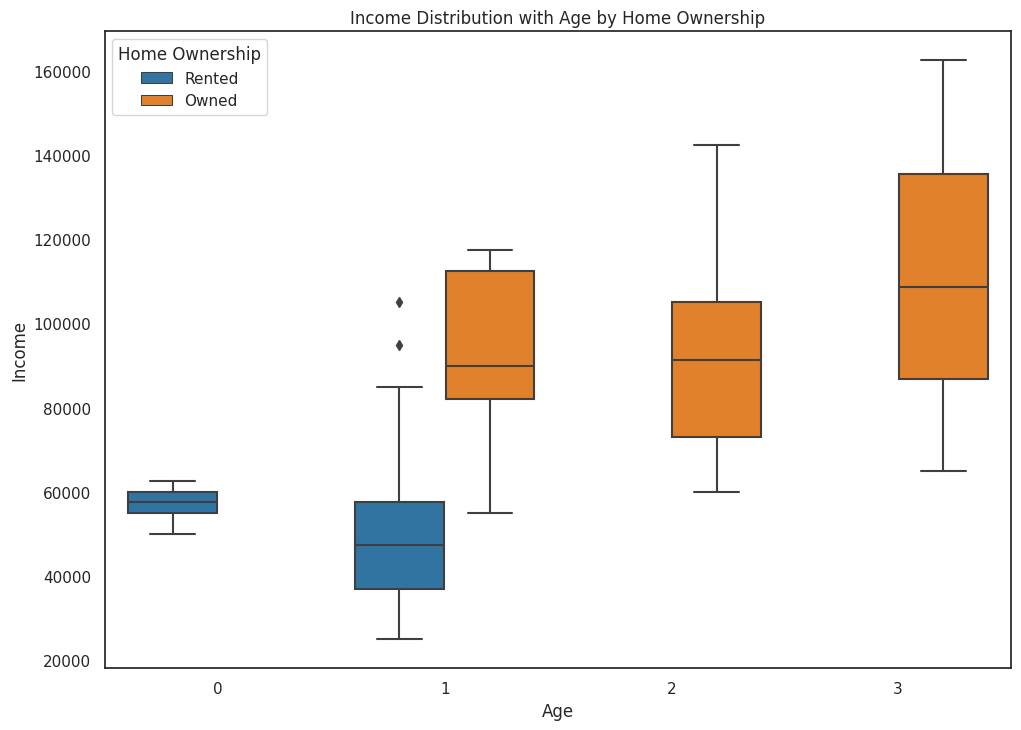

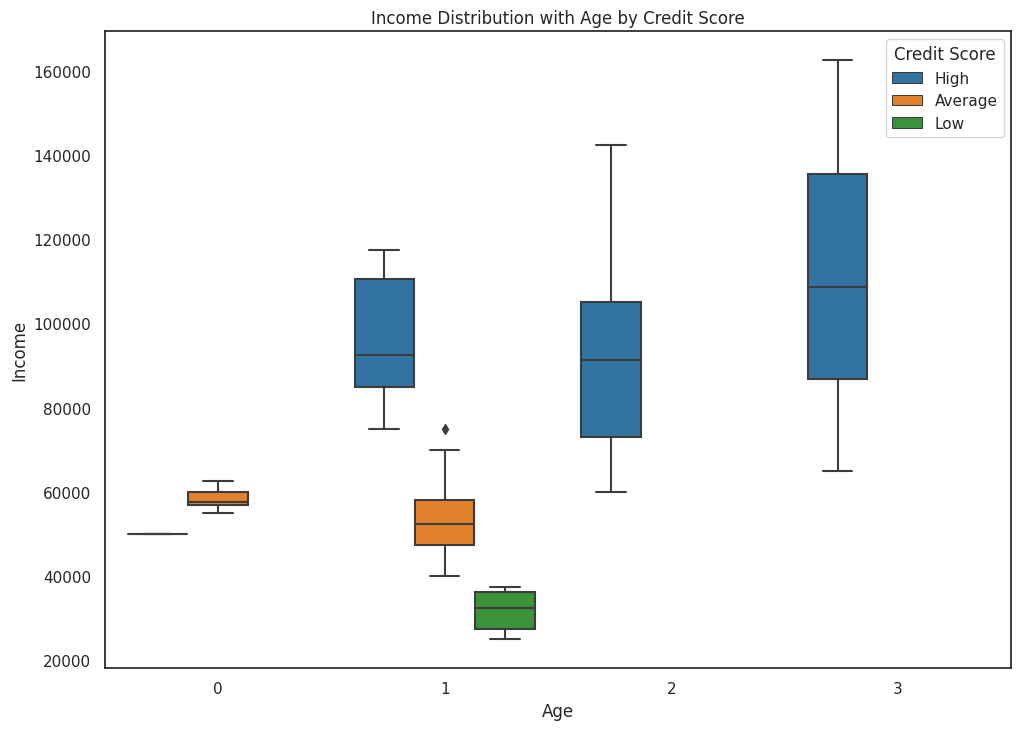

In [22]:
for i in object_data:
        sns.boxplot(data=data_credit,y=data_credit["Income"],x=data_credit["Age"],hue=i)
        plt.title(f"Income Distribution with Age by {i}")
        plt.ylabel("Income")
        plt.xlabel("Age")
        plt.show()

In [23]:
scaler=MinMaxScaler()
data_credit["Income"]=scaler.fit_transform(data_credit["Income"].values.reshape(-1, 1))

data_credit.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,0,1,0.181818,Bachelor's Degree,Single,0,Rented,High
1,1,0,0.545455,Master's Degree,Married,2,Owned,High
2,1,1,0.363636,Doctorate,Married,1,Owned,High
3,2,0,0.727273,High School Diploma,Single,0,Owned,High
4,2,1,0.545455,Bachelor's Degree,Married,3,Owned,High


________________________________________________________________________Income With Gender___________________________________________________________________



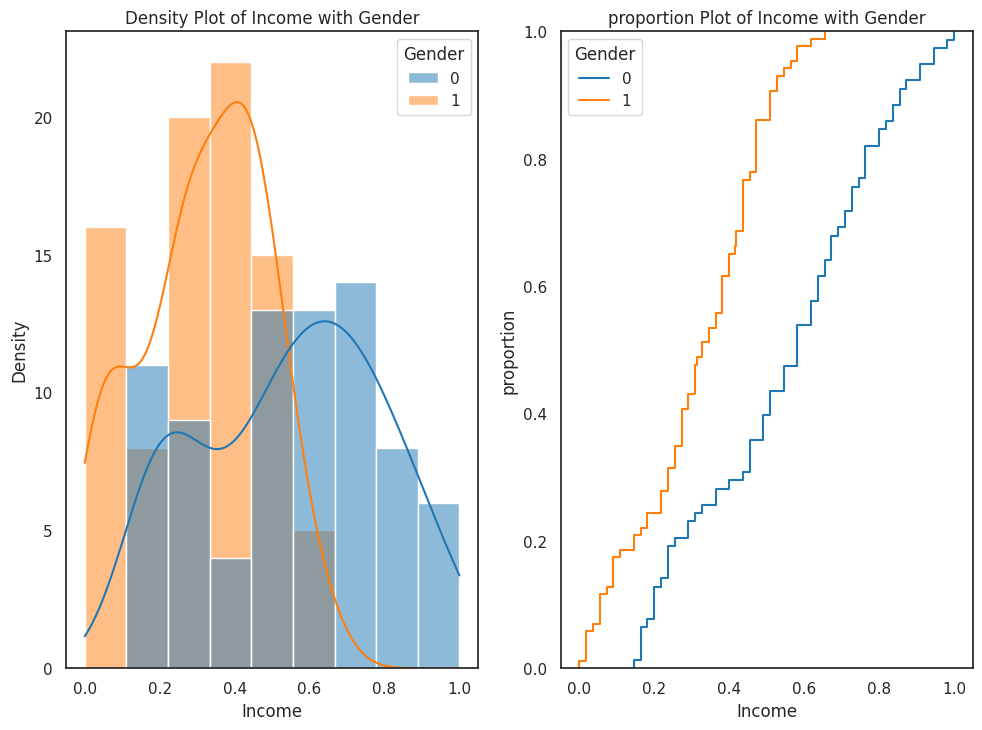

________________________________________________________________________Income With Education___________________________________________________________________



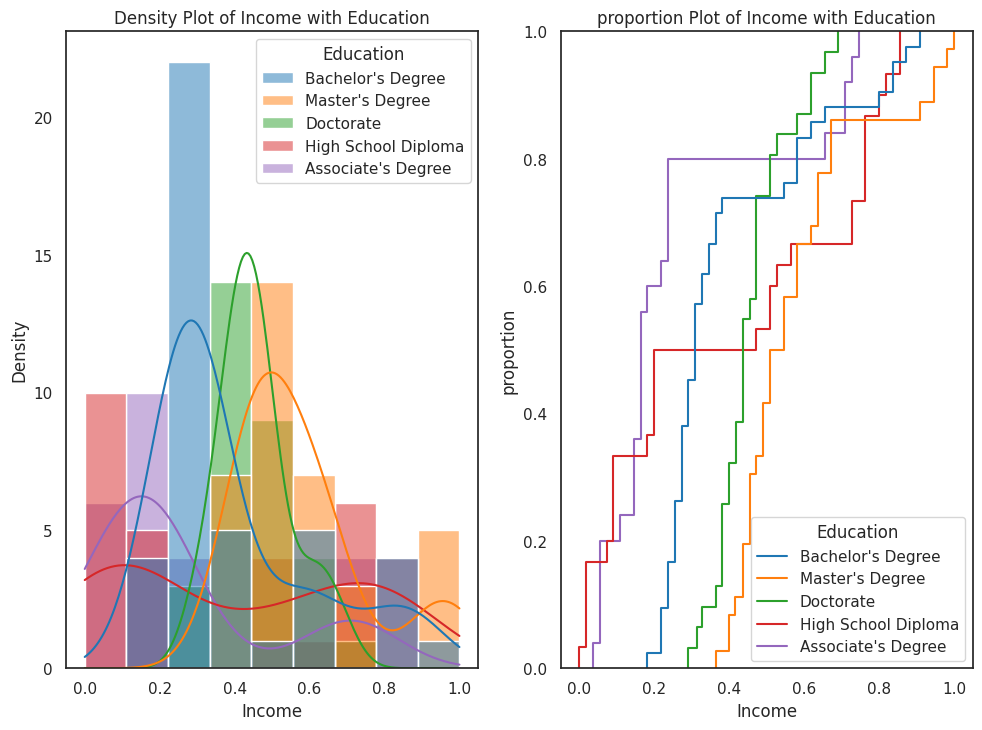

________________________________________________________________________Income With Marital Status___________________________________________________________________



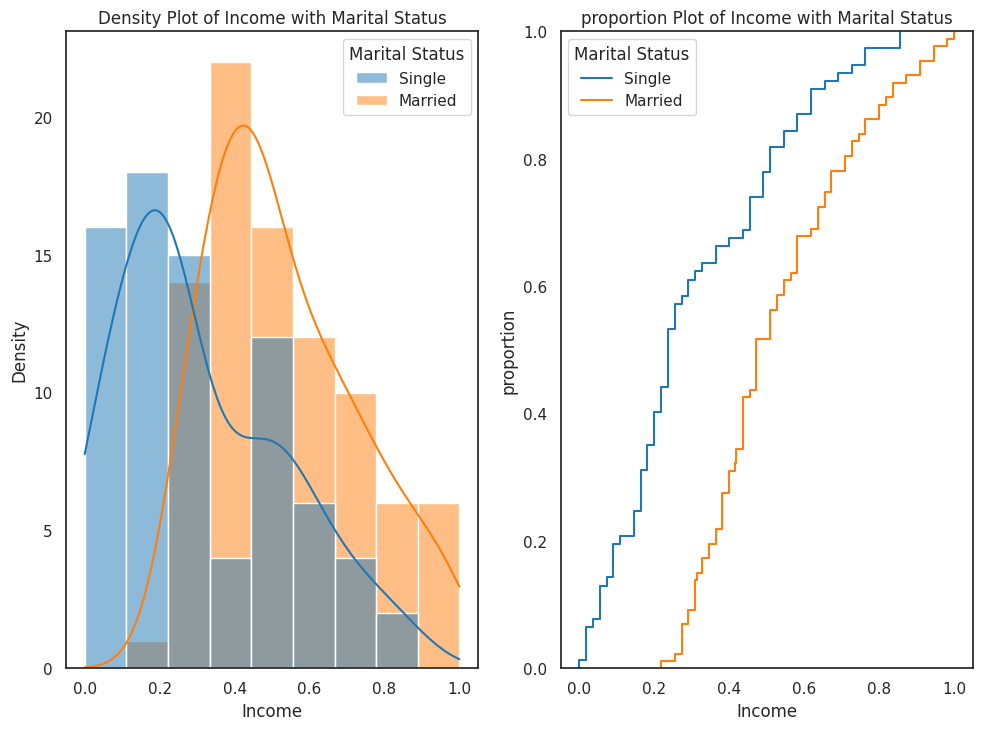

________________________________________________________________________Income With Home Ownership___________________________________________________________________



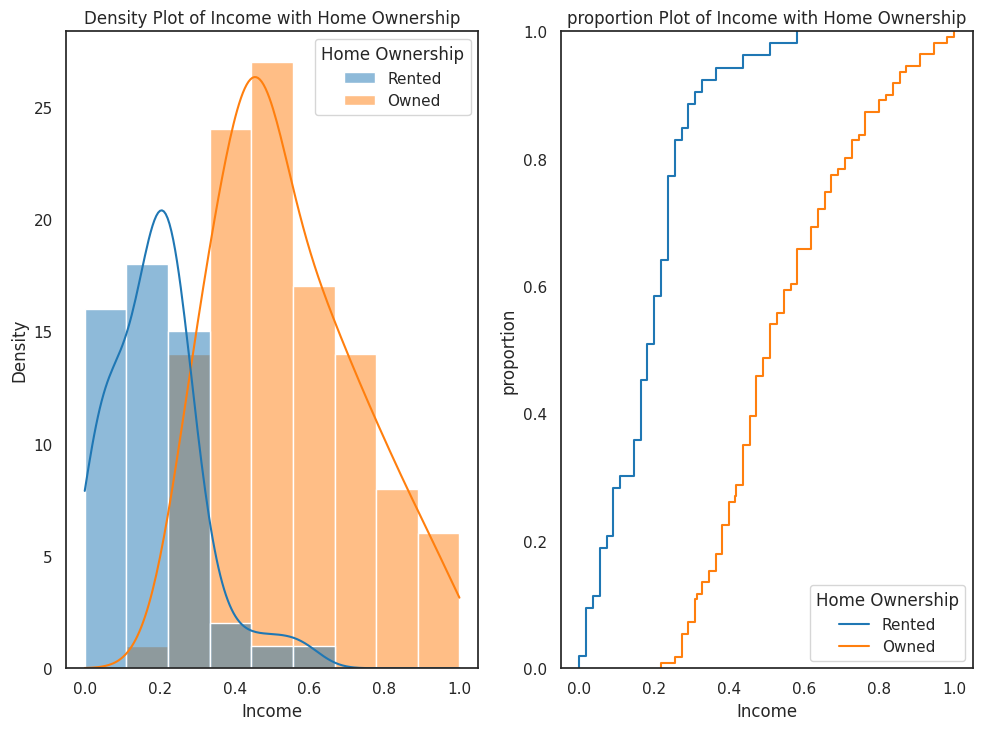

________________________________________________________________________Income With Credit Score___________________________________________________________________



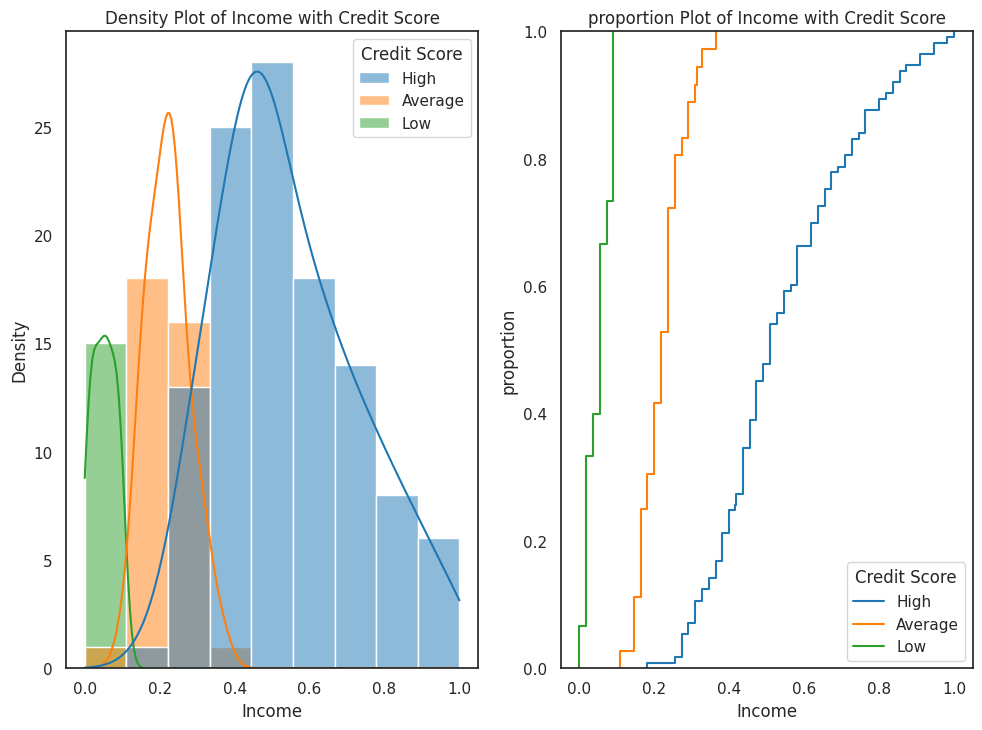

In [24]:
density("Income")

> **Education**

In [25]:
data_credit.Education.value_counts()

Education
Bachelor's Degree      42
Master's Degree        36
Doctorate              31
High School Diploma    30
Associate's Degree     25
Name: count, dtype: int64

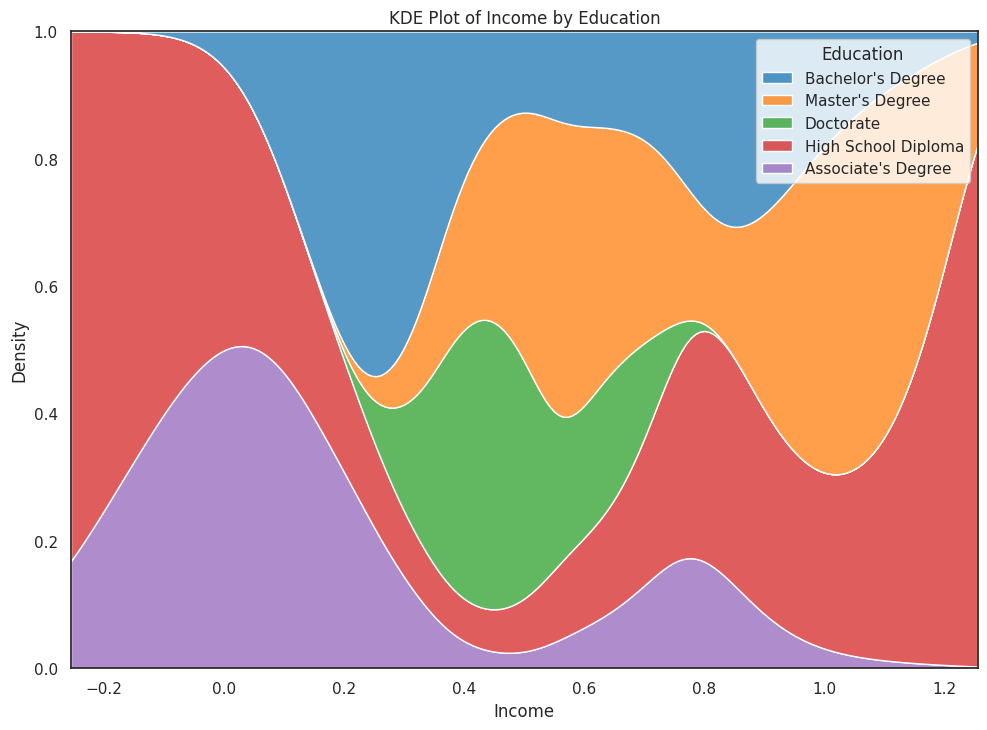

In [26]:
kde_plot("Education")

> Encoding

In [27]:
le=LabelEncoder()
data_credit["Education"]=le.fit_transform(data_credit["Education"])

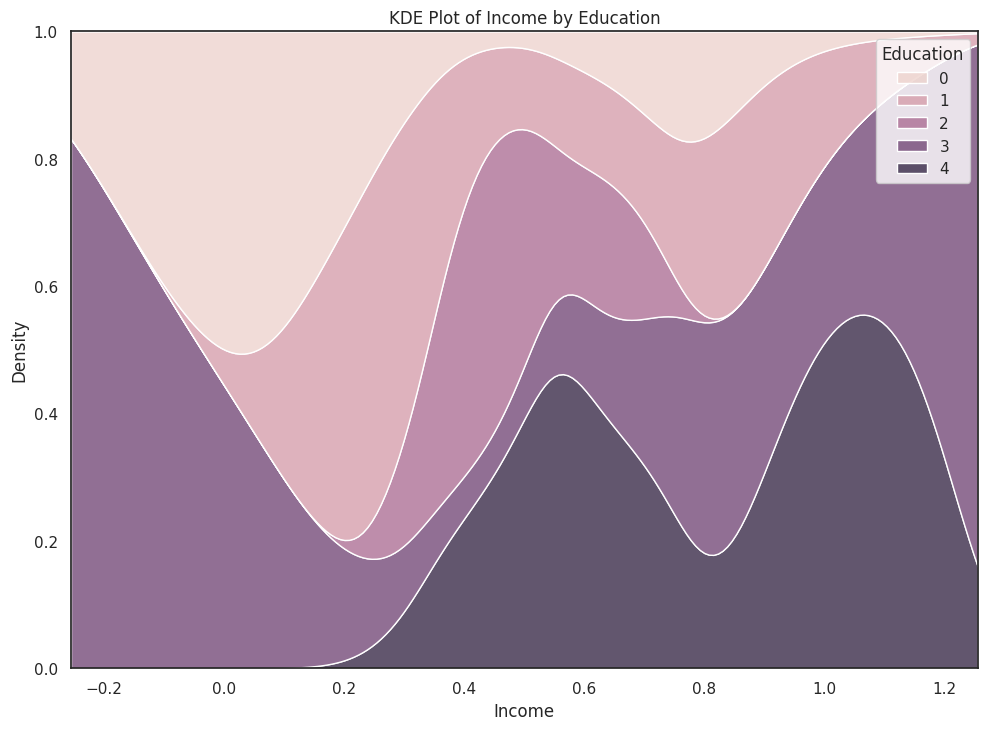

In [28]:
kde_plot("Education")

> **Marital Status**

In [29]:
data_credit["Marital Status"].value_counts()

Marital Status
Married    87
Single     77
Name: count, dtype: int64

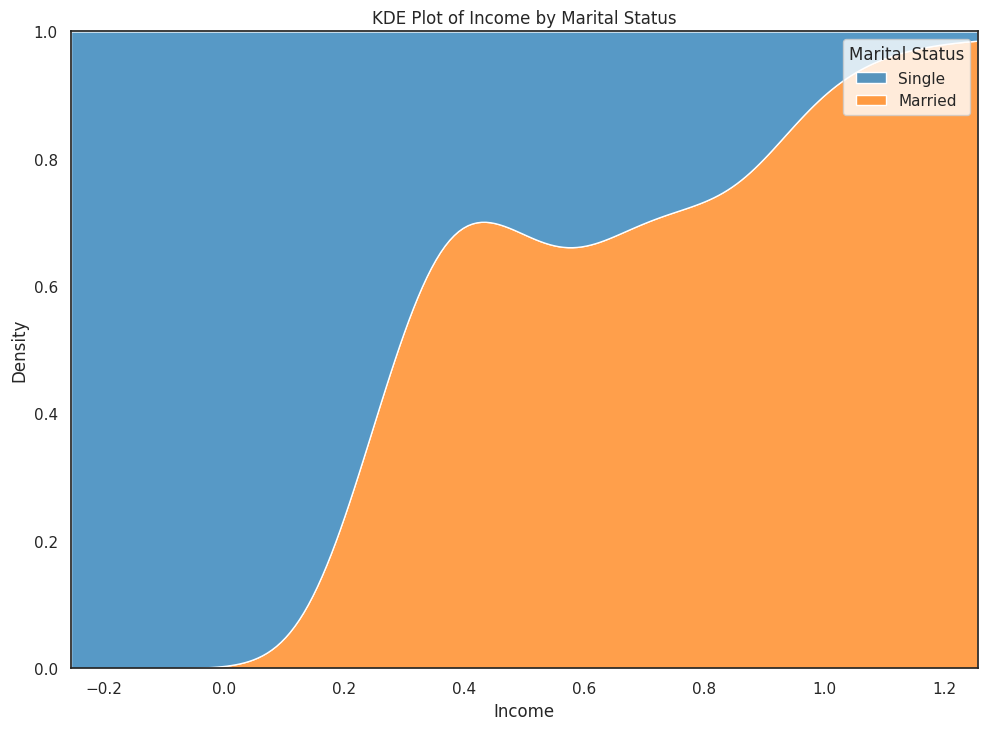

In [30]:
kde_plot("Marital Status")

> Encoding

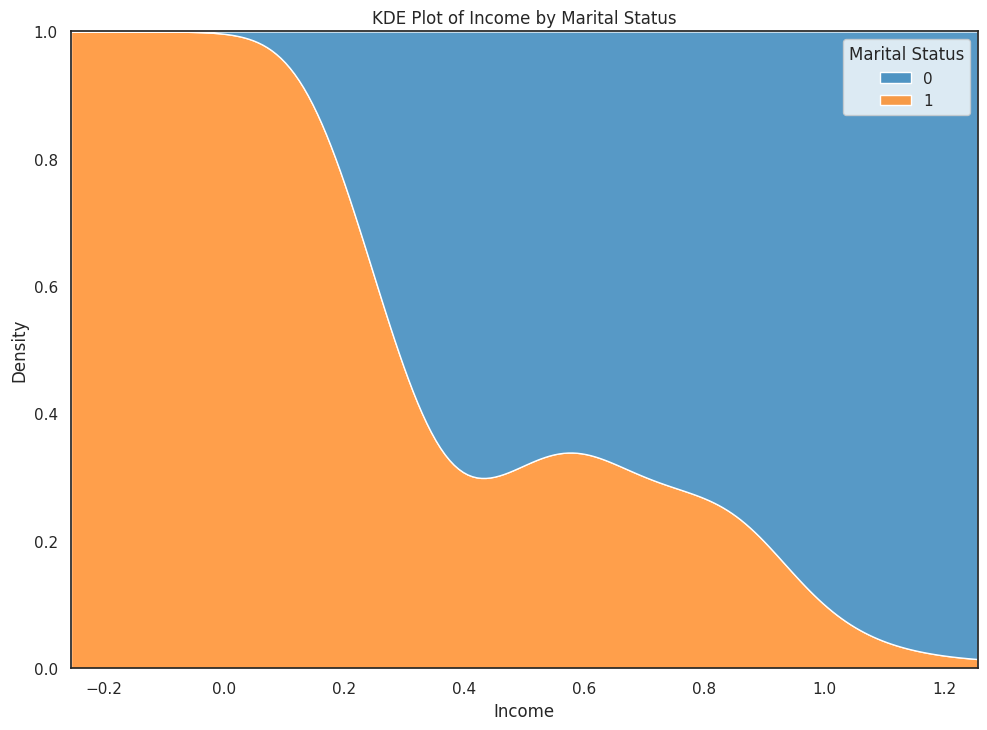

In [31]:
data_credit["Marital Status"]=le.fit_transform(data_credit["Marital Status"])
kde_plot("Marital Status")

> **Number of Children**

In [32]:
data_credit["Number of Children"].value_counts()

Number of Children
0    97
1    32
2    30
3     5
Name: count, dtype: int64

________________________________________________________________________Number of Children With Gender___________________________________________________________________



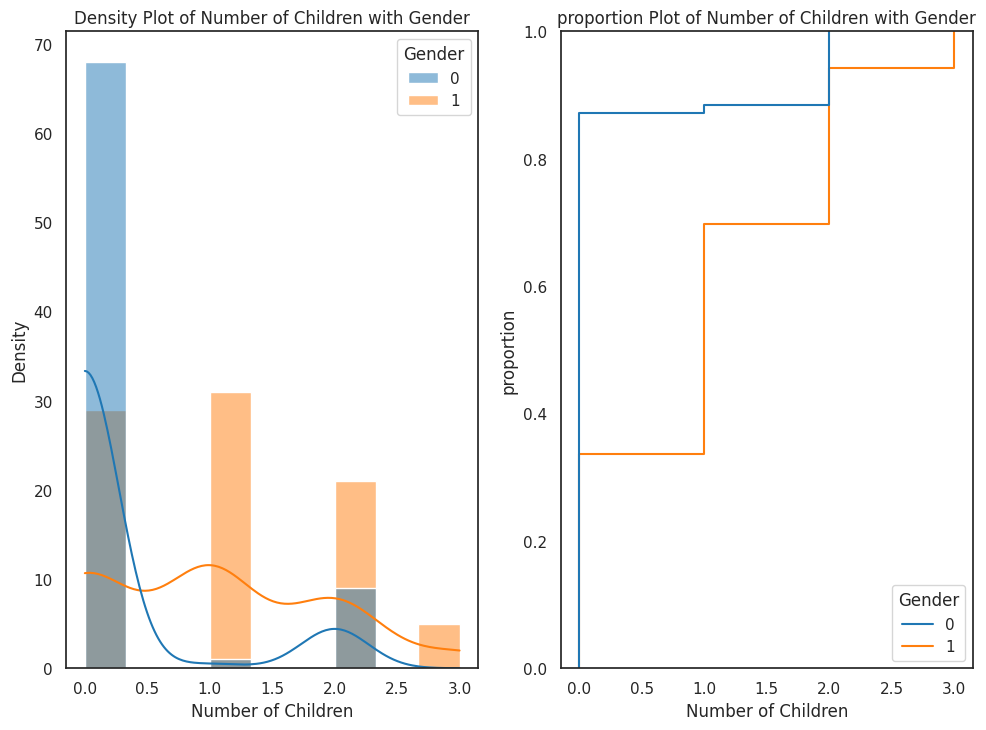

________________________________________________________________________Number of Children With Education___________________________________________________________________



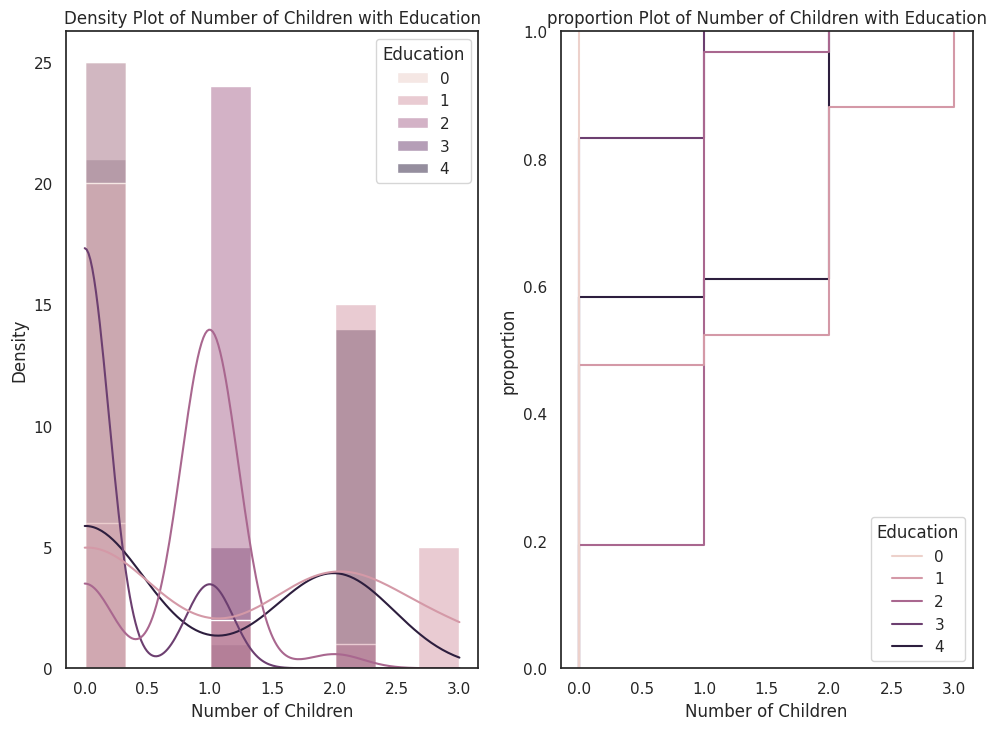

________________________________________________________________________Number of Children With Marital Status___________________________________________________________________



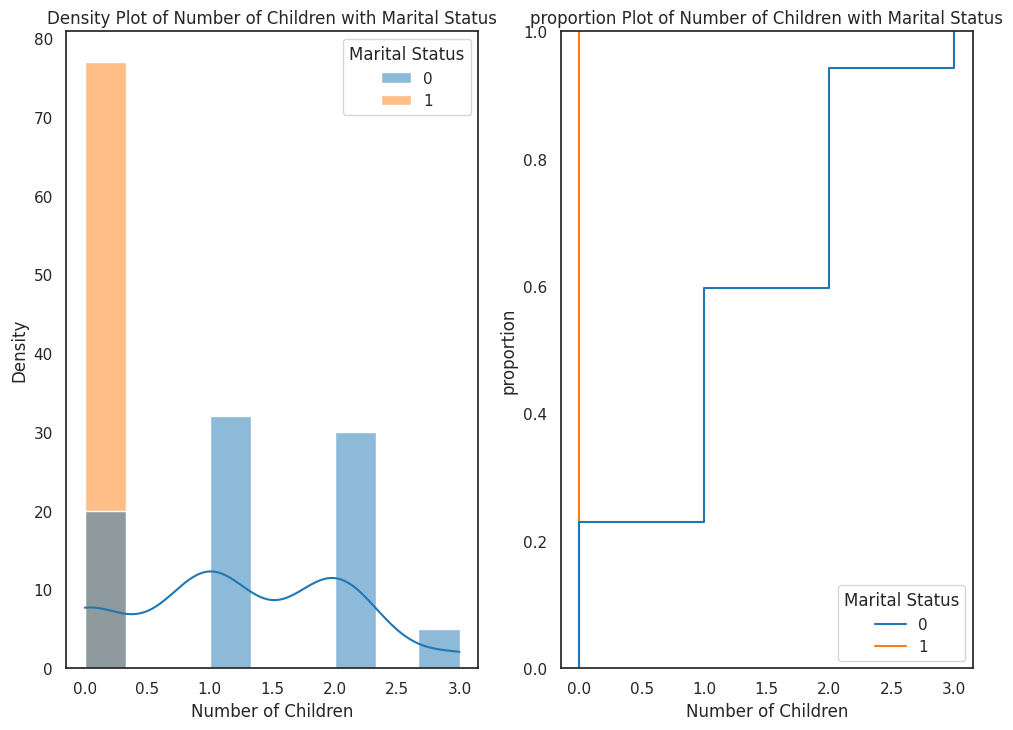

________________________________________________________________________Number of Children With Home Ownership___________________________________________________________________



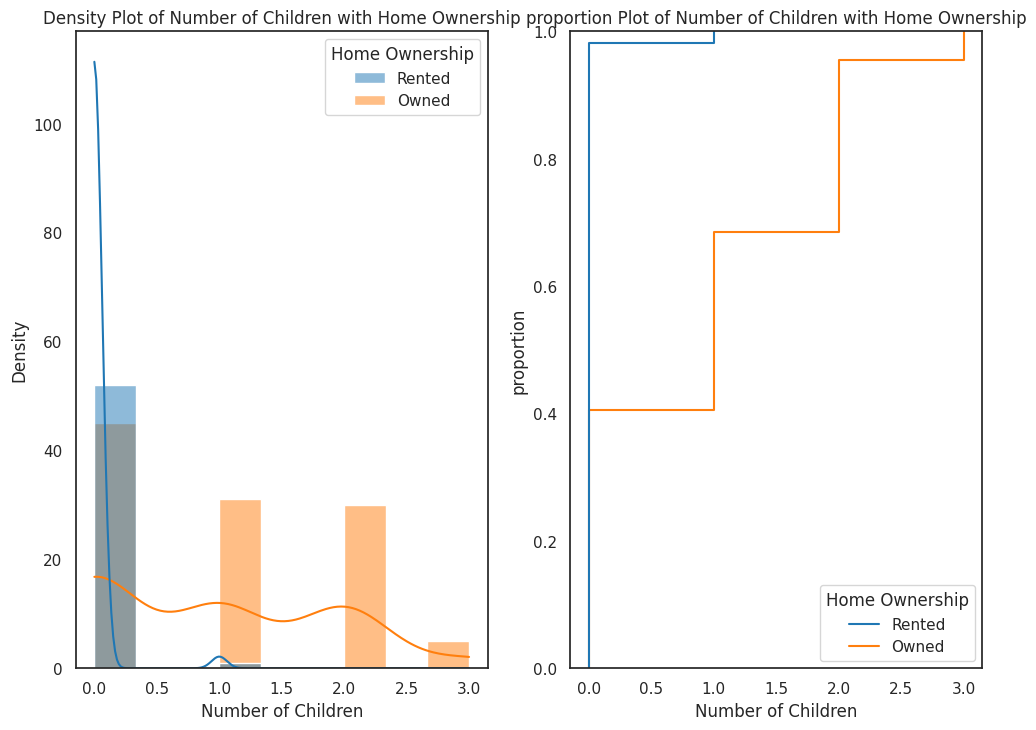

________________________________________________________________________Number of Children With Credit Score___________________________________________________________________



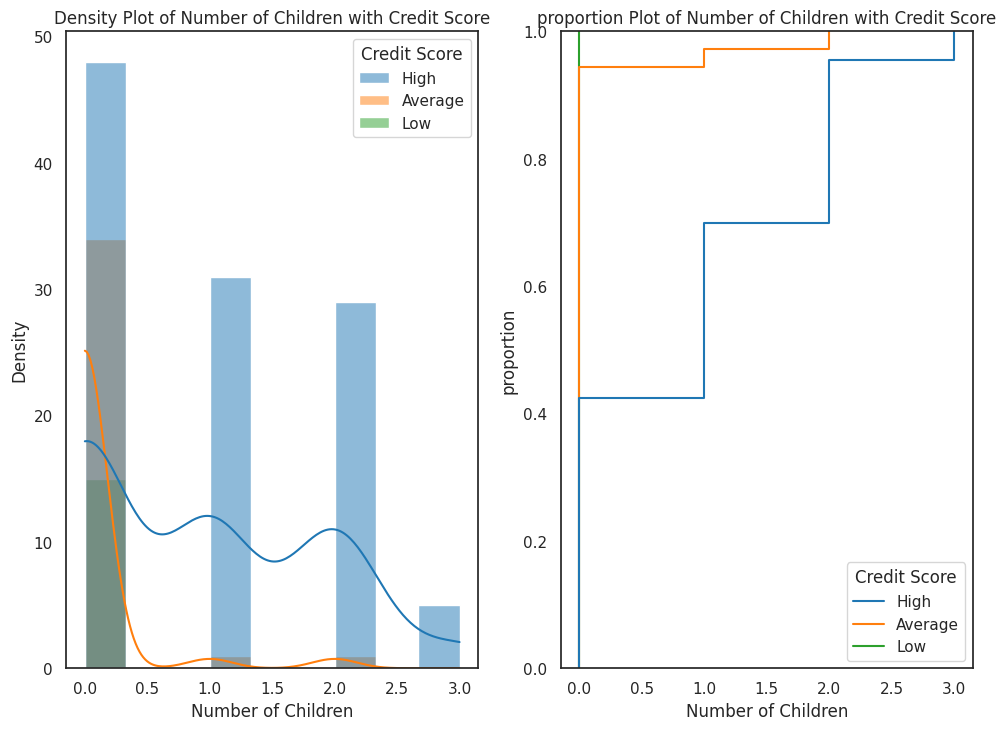

In [33]:
density("Number of Children")

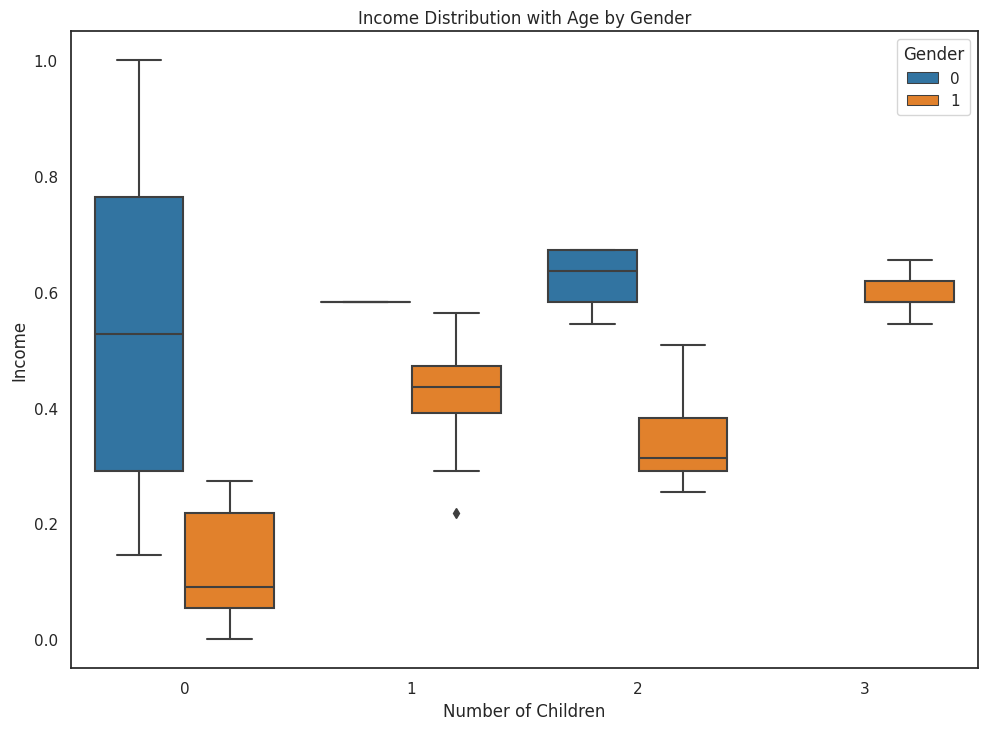

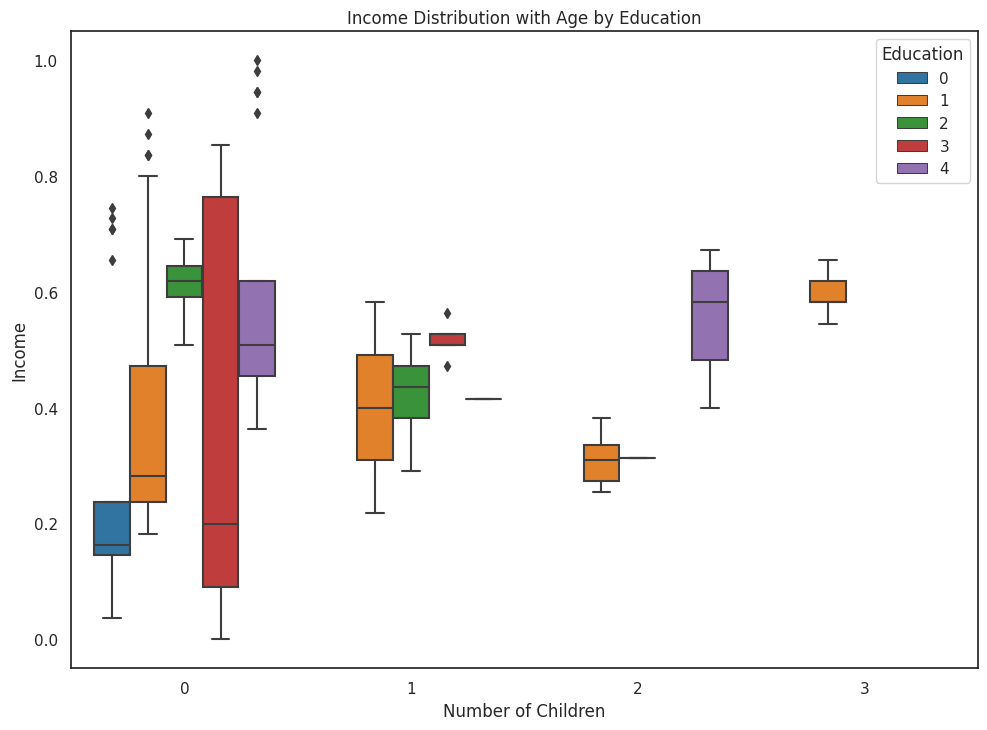

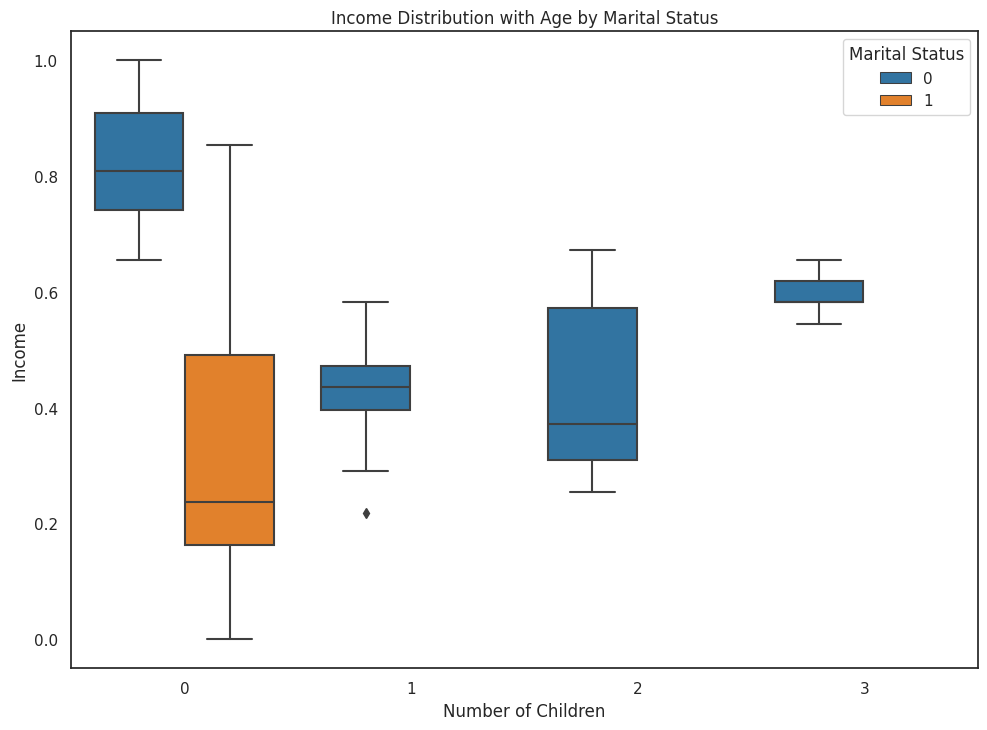

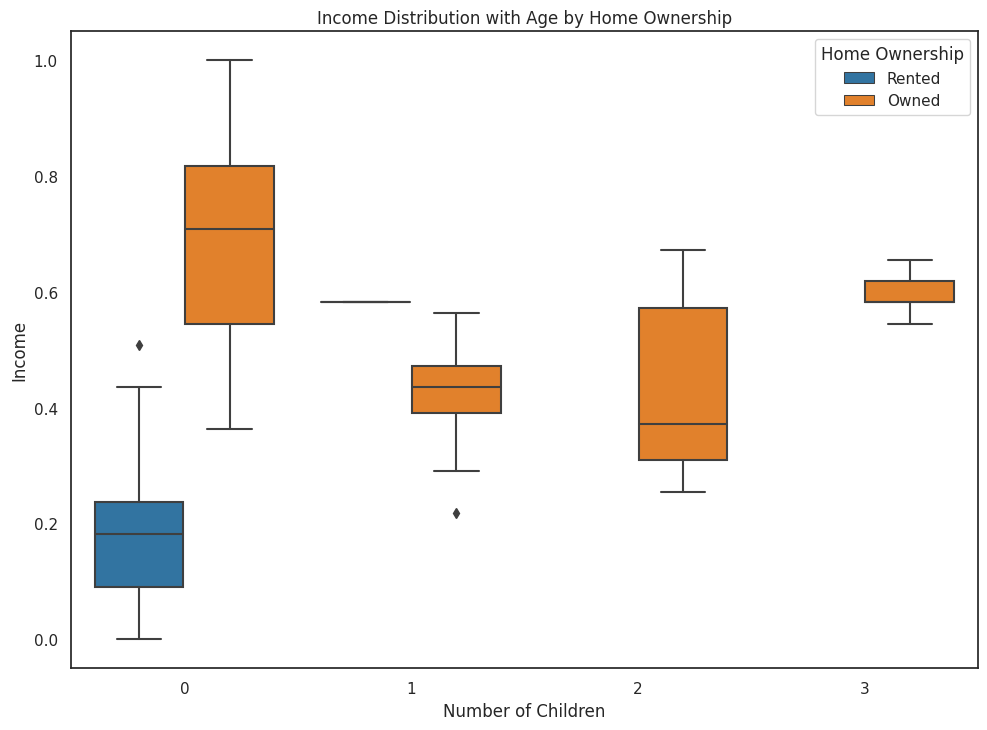

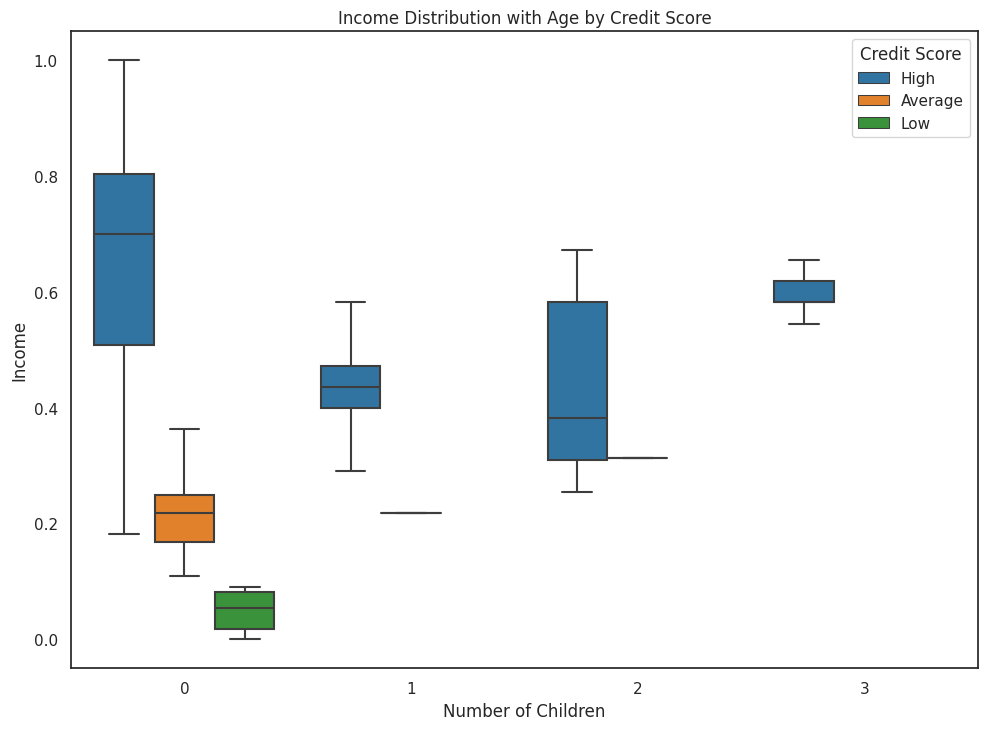

In [34]:
for i in object_data:
        sns.boxplot(data=data_credit,y=data_credit["Income"],x=data_credit["Number of Children"],hue=i)
        plt.title(f"Income Distribution with Age by {i}")
        plt.ylabel("Income")
        plt.xlabel("Number of Children")
        plt.show()

> **Home Ownership**

In [35]:
data_credit["Home Ownership"].value_counts()

Home Ownership
Owned     111
Rented     53
Name: count, dtype: int64

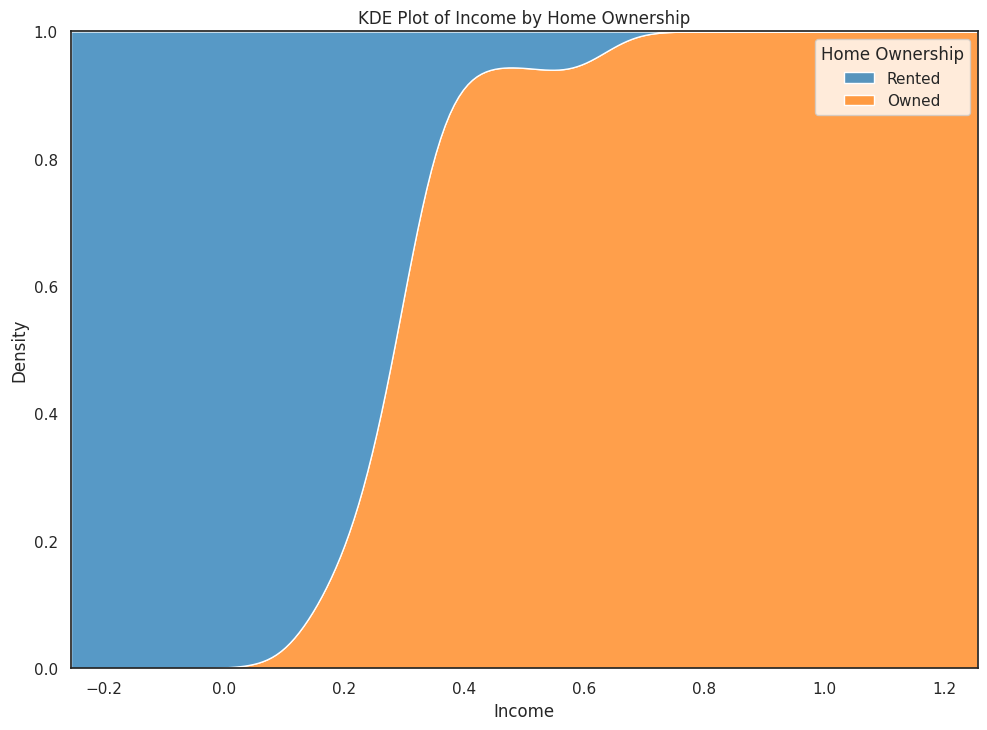

In [36]:
kde_plot("Home Ownership")

In [37]:
data_credit["Home Ownership"]=data_credit["Home Ownership"].replace(["Owned","Rented"],[1,0])

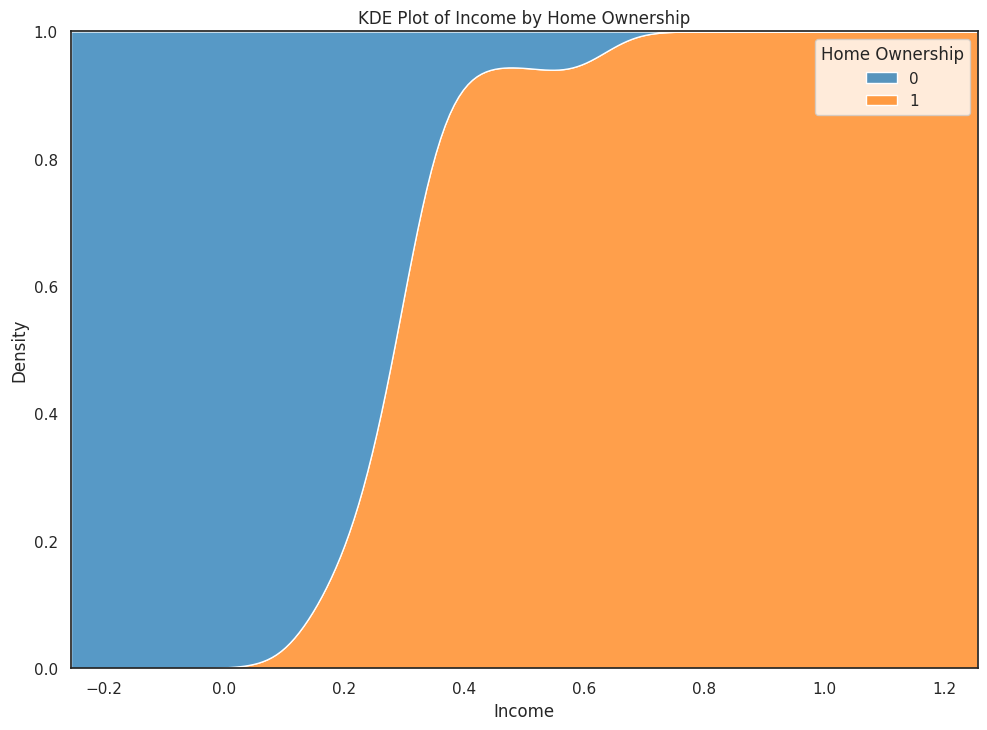

In [38]:
kde_plot("Home Ownership")

> **Credit Score**

In [39]:
data_credit["Credit Score"].value_counts()

Credit Score
High       113
Average     36
Low         15
Name: count, dtype: int64

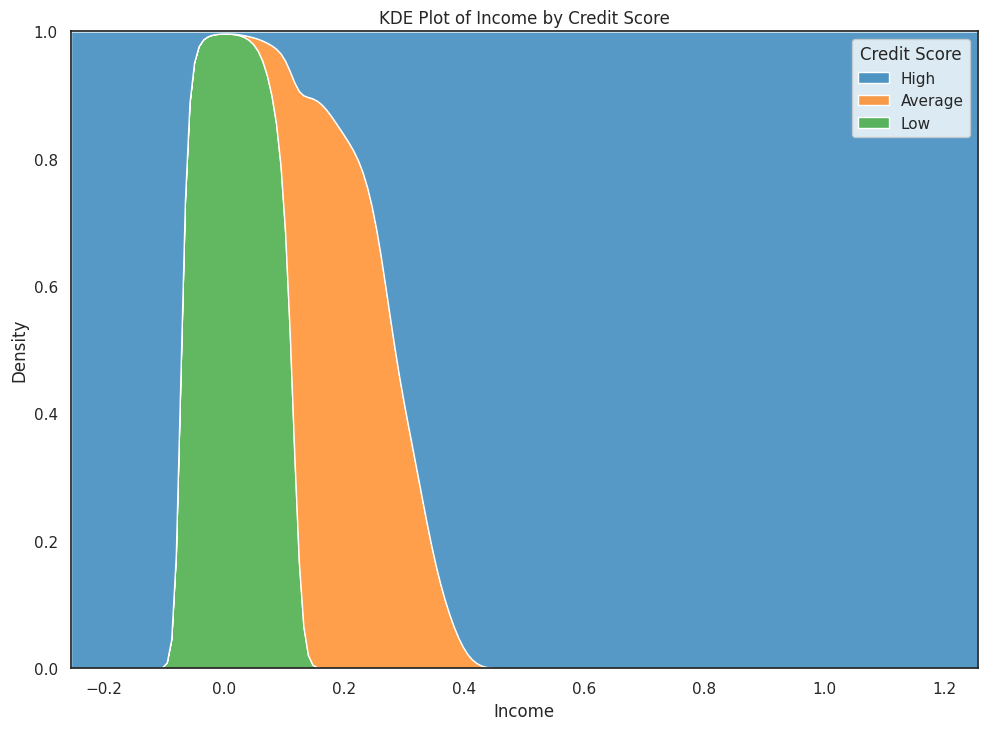

In [40]:
kde_plot("Credit Score")

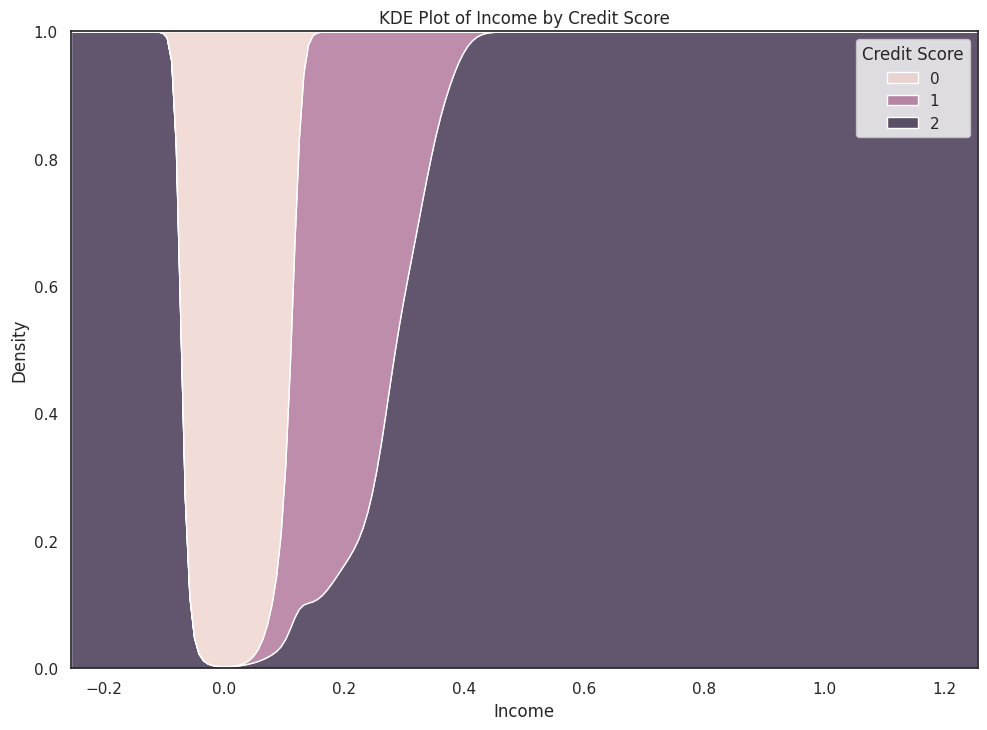

In [41]:
Credit_Score={"High":2,"Average":1,"Low":0}

data_credit["Credit Score"]=data_credit["Credit Score"].map(Credit_Score)
kde_plot("Credit Score")

In [42]:
data_credit.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

# **Spliting Data**

In [43]:
train=data_credit.drop(["Credit Score"],axis=1)
test=data_credit["Credit Score"]
train.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership
0,0,1,0.181818,1,1,0,0
1,1,0,0.545455,4,0,2,1
2,1,1,0.363636,2,0,1,1
3,2,0,0.727273,3,1,0,1
4,2,1,0.545455,1,0,3,1


In [44]:
test.head()

0    2
1    2
2    2
3    2
4    2
Name: Credit Score, dtype: int64

In [45]:
x_train,x_test,y_train,y_test=train_test_split(train,test,test_size=.3,random_state=42)
x_train.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership
97,2,1,0.654545,1,0,3,1
11,3,0,0.800000,1,0,0,1
65,2,1,0.618182,1,0,3,1
86,1,0,0.163636,0,1,0,0
6,1,1,0.109091,0,1,0,0


In [46]:
y_test.head()

135    1
115    2
131    1
55     2
95     2
Name: Credit Score, dtype: int64

# **ML Models**

In [47]:
svc=SVC(kernel="rbf",C=2,probability=True)
knn=KNeighborsClassifier(n_neighbors=10)
tree=DecisionTreeClassifier(max_depth=15,max_features=10,random_state=42,criterion="entropy")
froest=RandomForestClassifier(n_estimators=100,max_depth=10,max_features=7,random_state=42,criterion="entropy")
grad=GradientBoostingClassifier(n_estimators=100,learning_rate=.5,max_depth=10,max_features=7)
Ada=AdaBoostClassifier(n_estimators=100,learning_rate=.5)
xgb=XGBClassifier()
voting=VotingClassifier(estimators=[("SVC",svc),("KNeighborsClassifier",knn),("DecisionTreeClassifier",tree),("RandomForestClassifier",froest),
                                    ("GradientBoostingClassifier",grad),("AdaBoostClassifier",Ada),("XGBClassifier",xgb)],voting="hard")

models=[svc,knn,tree,froest,grad,Ada,xgb,voting]

===> SVC(C=2, probability=True) 

>> y_pred : 
 [1 2 2 2 2 1 2 2 2 2 1 0 2 2 0 2 1 0 2 2 2 1 0 2 2 2 2 2 1 1 2 2 2 2 2 2 2
 1 2 1 2 1 0 1 2 1 2 2 2 1]

>> Elevation 

>>> Accuracy: 88.0

>>> CR by library method=
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.69      0.82      0.75        11
           2       0.94      0.94      0.94        32

    accuracy                           0.88        50
   macro avg       0.88      0.82      0.84        50
weighted avg       0.89      0.88      0.88        50

>>> Confusion_matrix=
 [[ 5  2  0]
 [ 0  9  2]
 [ 0  2 30]]



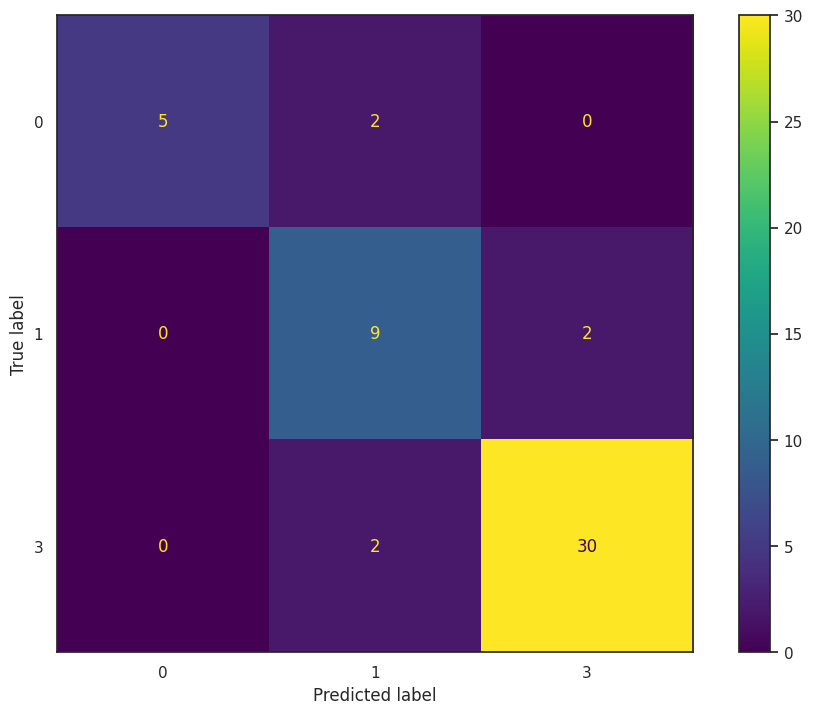



===> KNeighborsClassifier(n_neighbors=10) 

>> y_pred : 
 [1 2 2 2 2 1 2 2 2 2 0 0 2 2 0 2 2 0 2 2 2 1 0 2 2 2 2 2 1 1 2 2 2 2 2 2 2
 1 2 1 2 1 0 1 2 1 2 2 2 1]

>> Elevation 

>>> Accuracy: 88.0

>>> CR by library method=
               precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.73      0.73      0.73        11
           2       0.94      0.97      0.95        32

    accuracy                           0.88        50
   macro avg       0.83      0.80      0.82        50
weighted avg       0.88      0.88      0.88        50

>>> Confusion_matrix=
 [[ 5  2  0]
 [ 1  8  2]
 [ 0  1 31]]



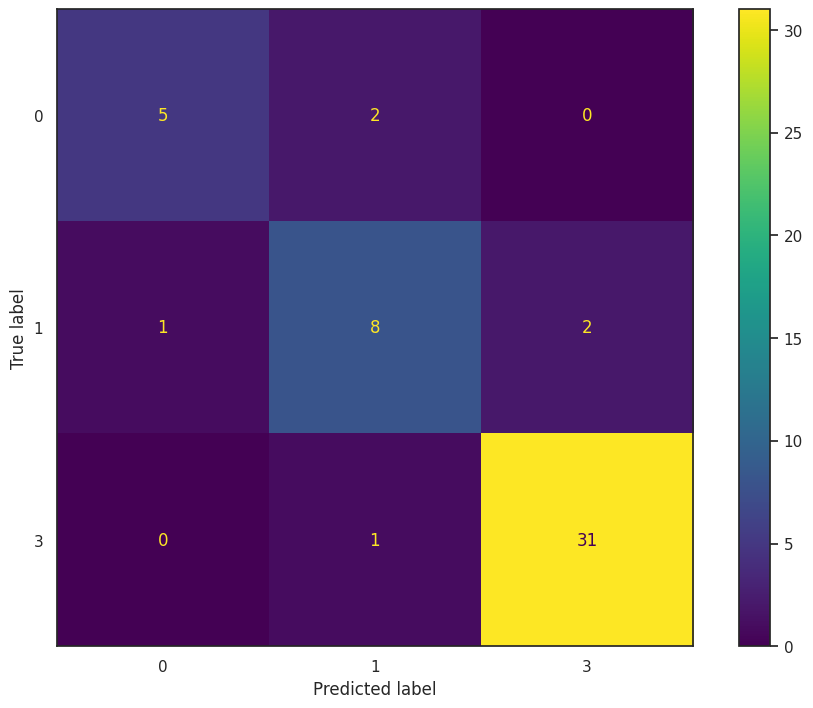



===> DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features=10,
                       random_state=42) 

>> y_pred : 
 [1 2 2 2 2 1 2 2 2 2 1 0 2 2 0 2 1 0 2 2 2 0 0 2 2 2 2 2 2 1 2 2 2 2 2 2 2
 1 2 0 2 1 0 1 2 1 2 2 2 1]

>> Elevation 

>>> Accuracy: 94.0

>>> CR by library method=
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.90      0.82      0.86        11
           2       0.94      0.97      0.95        32

    accuracy                           0.94        50
   macro avg       0.95      0.93      0.94        50
weighted avg       0.94      0.94      0.94        50

>>> Confusion_matrix=
 [[ 7  0  0]
 [ 0  9  2]
 [ 0  1 31]]



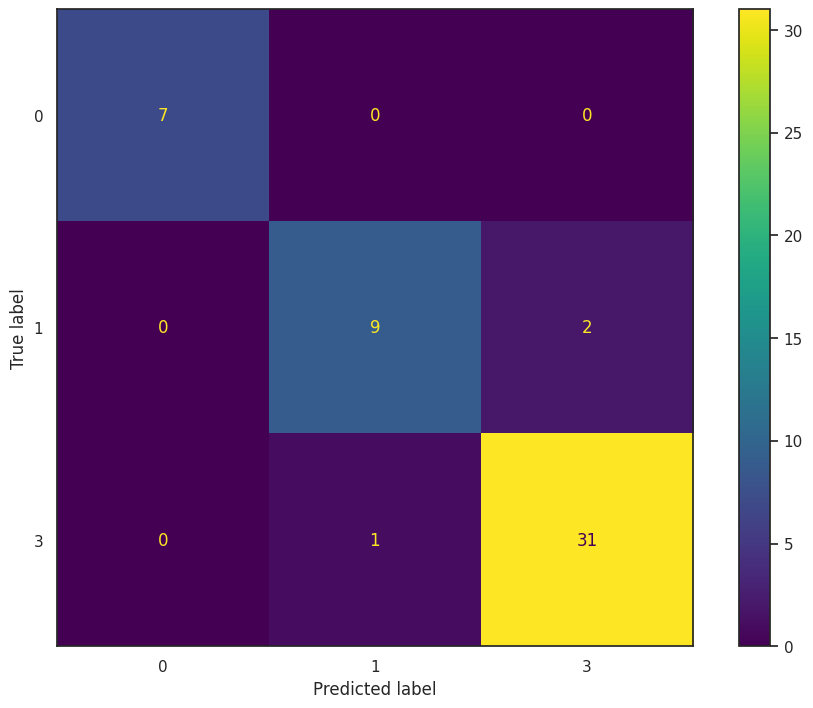



===> RandomForestClassifier(criterion='entropy', max_depth=10, max_features=7,
                       random_state=42) 

>> y_pred : 
 [1 2 2 2 2 1 2 2 2 2 1 0 2 2 0 2 1 0 2 2 2 0 0 2 2 2 2 2 2 1 2 2 2 2 2 2 2
 1 2 0 2 1 0 1 2 1 2 2 2 1]

>> Elevation 

>>> Accuracy: 94.0

>>> CR by library method=
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.90      0.82      0.86        11
           2       0.94      0.97      0.95        32

    accuracy                           0.94        50
   macro avg       0.95      0.93      0.94        50
weighted avg       0.94      0.94      0.94        50

>>> Confusion_matrix=
 [[ 7  0  0]
 [ 0  9  2]
 [ 0  1 31]]



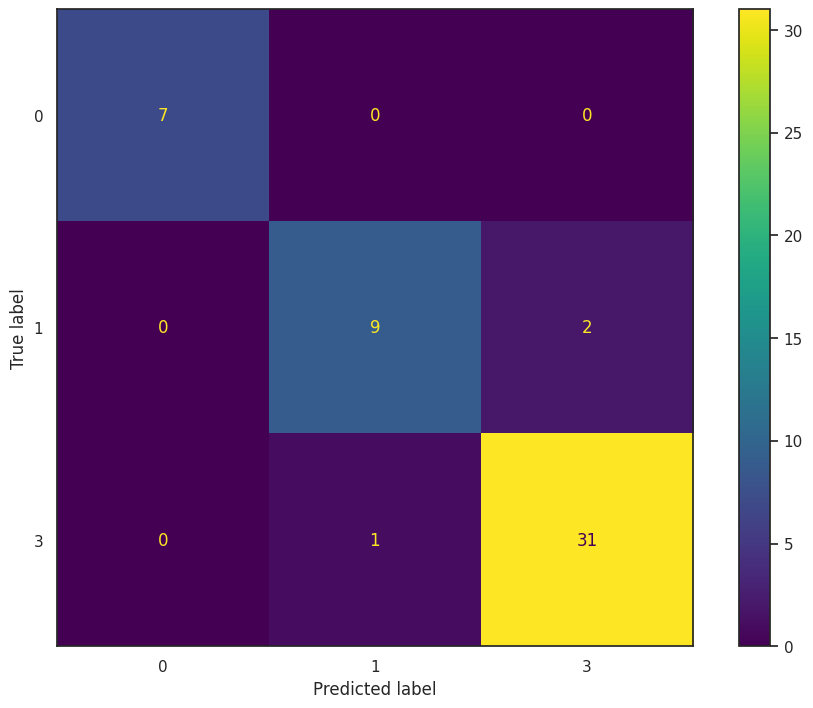



===> GradientBoostingClassifier(learning_rate=0.5, max_depth=10, max_features=7) 

>> y_pred : 
 [1 2 2 2 2 1 2 2 2 2 1 0 2 2 0 2 1 0 2 2 2 0 0 2 2 2 2 2 2 1 2 2 2 2 2 2 2
 1 2 0 2 1 0 1 2 1 2 2 2 1]

>> Elevation 

>>> Accuracy: 94.0

>>> CR by library method=
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.90      0.82      0.86        11
           2       0.94      0.97      0.95        32

    accuracy                           0.94        50
   macro avg       0.95      0.93      0.94        50
weighted avg       0.94      0.94      0.94        50

>>> Confusion_matrix=
 [[ 7  0  0]
 [ 0  9  2]
 [ 0  1 31]]



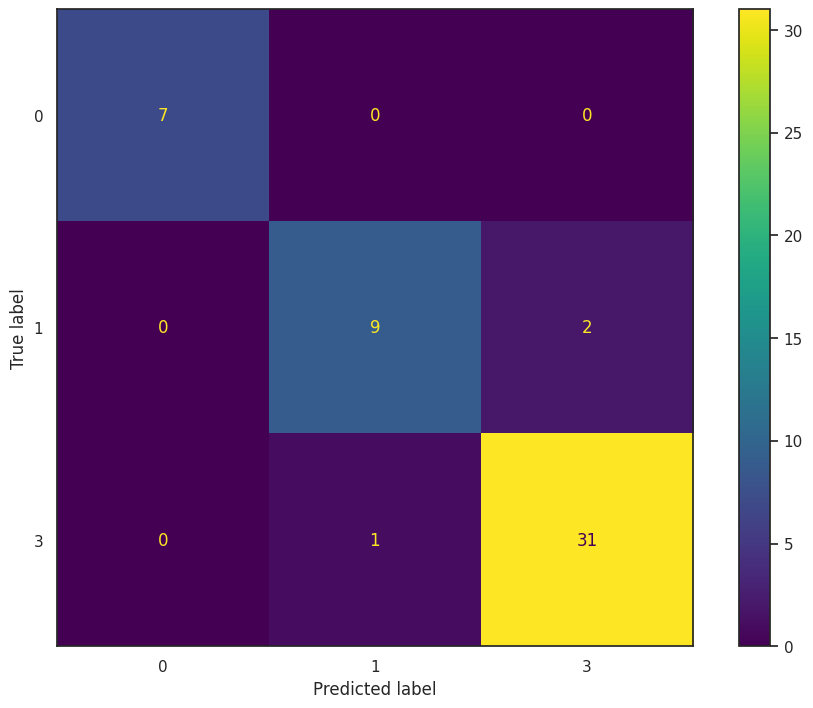



===> AdaBoostClassifier(learning_rate=0.5, n_estimators=100) 

>> y_pred : 
 [1 2 2 2 2 1 2 2 2 2 1 0 2 2 0 2 2 0 2 2 2 0 0 2 2 2 2 2 2 1 2 2 2 2 2 2 2
 1 2 0 2 1 0 1 2 1 2 2 2 1]

>> Elevation 

>>> Accuracy: 96.0

>>> CR by library method=
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.82      0.90        11
           2       0.94      1.00      0.97        32

    accuracy                           0.96        50
   macro avg       0.98      0.94      0.96        50
weighted avg       0.96      0.96      0.96        50

>>> Confusion_matrix=
 [[ 7  0  0]
 [ 0  9  2]
 [ 0  0 32]]



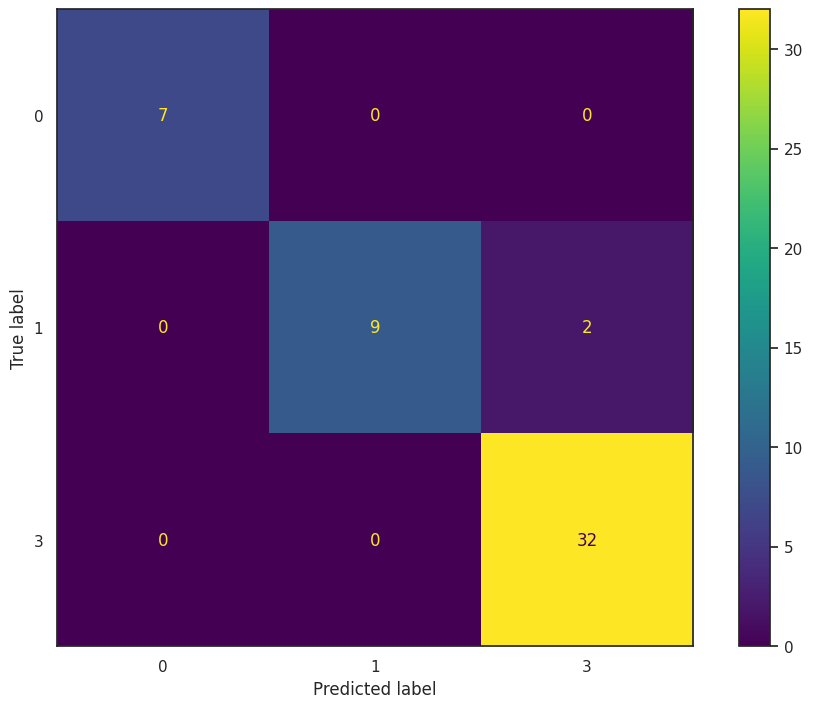



===> XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) 

>> y_pred : 
 [1 2 2 2 2 1 2 2 2 2 1 0 2 2 0 2 2 0 2 2 2 0 0 2 2 2 2 2 2 1 2 2 2 2 2 2 2
 1 2 0 2 1 0 1 2 1 2 2 2 1]

>> Elevation 

>>> Accuracy: 96.0

>>> CR by library method=
               precision    recall  f1-score   support

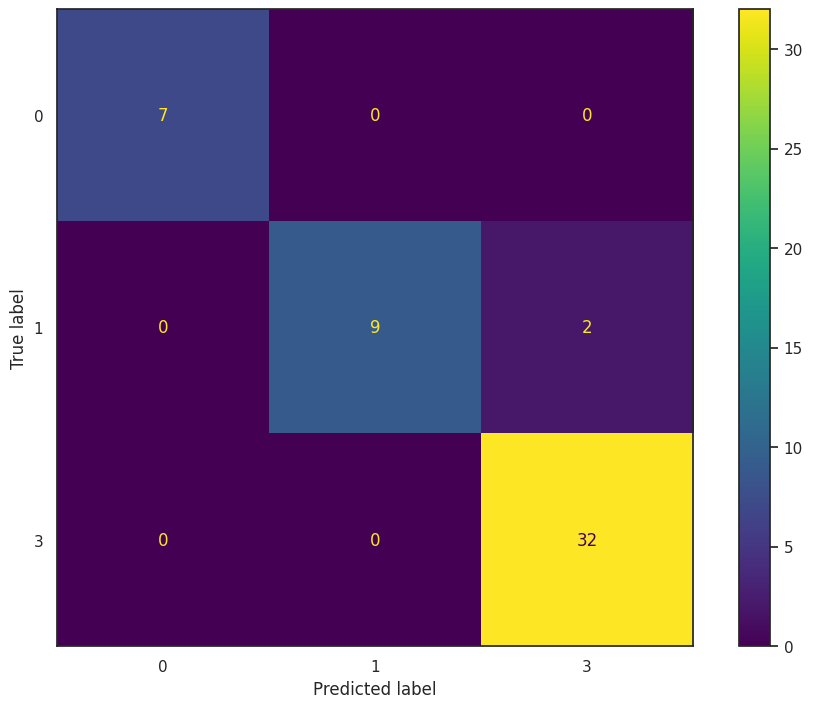



===> VotingClassifier(estimators=[('SVC', SVC(C=2, probability=True)),
                             ('KNeighborsClassifier',
                              KNeighborsClassifier(n_neighbors=10)),
                             ('DecisionTreeClassifier',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=15,
                                                     max_features=10,
                                                     random_state=42)),
                             ('RandomForestClassifier',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=10,
                                                     max_features=7,
                                                     random_state...
                                            grow_policy=None,
                                            importance_type=None,
  

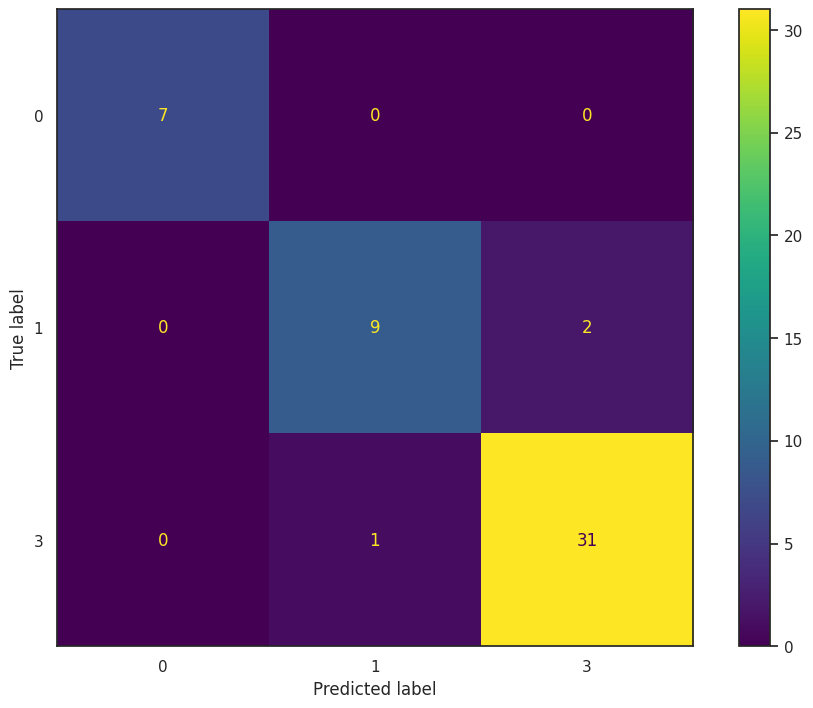

In [48]:
for model in models:
    print(f"===> {model} \n")
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f">> y_pred : \n {y_pred}\n")
    print(">> Elevation \n") 
    accuracy = accuracy_score(y_test, y_pred)*100
    print(f">>> Accuracy: {accuracy}\n")
    print(">>> CR by library method=\n", classification_report(y_test, y_pred)) 
    cm=confusion_matrix(y_test, y_pred)
    print(f">>> Confusion_matrix=\n {cm}\n") 
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1,3])
    cm_display.plot()
    plt.show()
    print("\n==============================================================================================================================================\n")
    

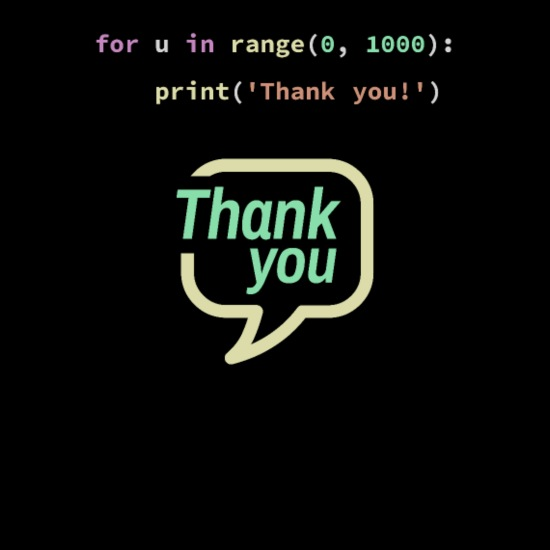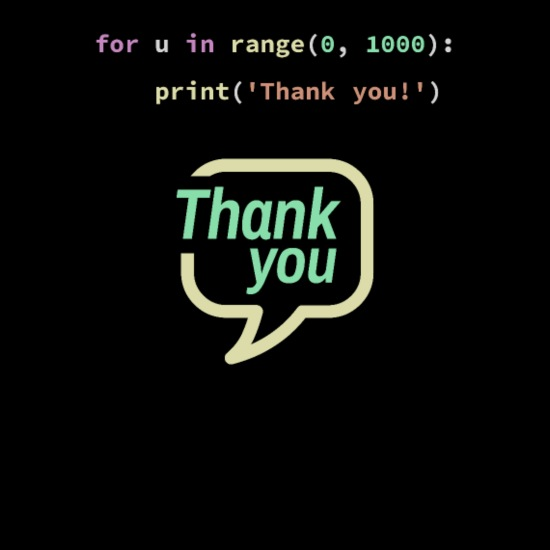